In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from datetime import datetime as dt
import inflect
ENG = inflect.engine()
from constants import (DATA_OCT, DATA_NOV, EXPORT_DIR, UX_CONSTANTS, SEED)

In [2]:
FONT_SIZE = 24
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = FONT_SIZE
plt.rcParams['legend.fontsize'] = FONT_SIZE
plt.rcParams['xtick.labelsize'] = FONT_SIZE
plt.rcParams['ytick.labelsize'] = FONT_SIZE
%config InlineBackend.figure_format ='retina'
# %matplotlib widget

In [3]:
df = pd.concat([pd.read_csv(DATA_OCT, engine='c', sep=',')
                ,pd.read_csv(DATA_NOV, engine='c', sep=',')])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8738120 entries, 0 to 4635836
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 666.7+ MB


In [5]:
df["price"] = df["price"].astype("float32")

In [6]:
df["event_type"] = df["event_type"].astype("category")

In [7]:
df['event_time'] = pd.to_datetime(df['event_time'],infer_datetime_format=True)

In [8]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295
4635833,2019-11-30 23:59:47,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95
4635834,2019-11-30 23:59:47,view,5867785,1487580007835370453,NaN,kims,31.10,572579084,d42865b7-7e04-4038-9be0-a59165625f06
4635835,2019-11-30 23:59:57,view,5779406,2151191071051219817,NaN,NaN,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063


In [9]:
event_counts = df.event_type.value_counts()
event_counts

view                3938296
cart                2544192
remove_from_cart    1687591
purchase             568041
Name: event_type, dtype: int64

In [10]:
def NaN_percent(df, column_name):
    row_count = df[column_name].shape[0]
    empty_values = row_count - df[column_name].count()
    if empty_values > 0:
        print(f"{column_name}: {(100.0*empty_values)/row_count:.4f}%")
    return True
print('Columns with at least one NaN value:')
for i in list(df):    
    NaN_percent(df,i)

Columns with at least one NaN value:
category_code: 98.3609%
brand: 41.7171%
user_session: 0.0166%


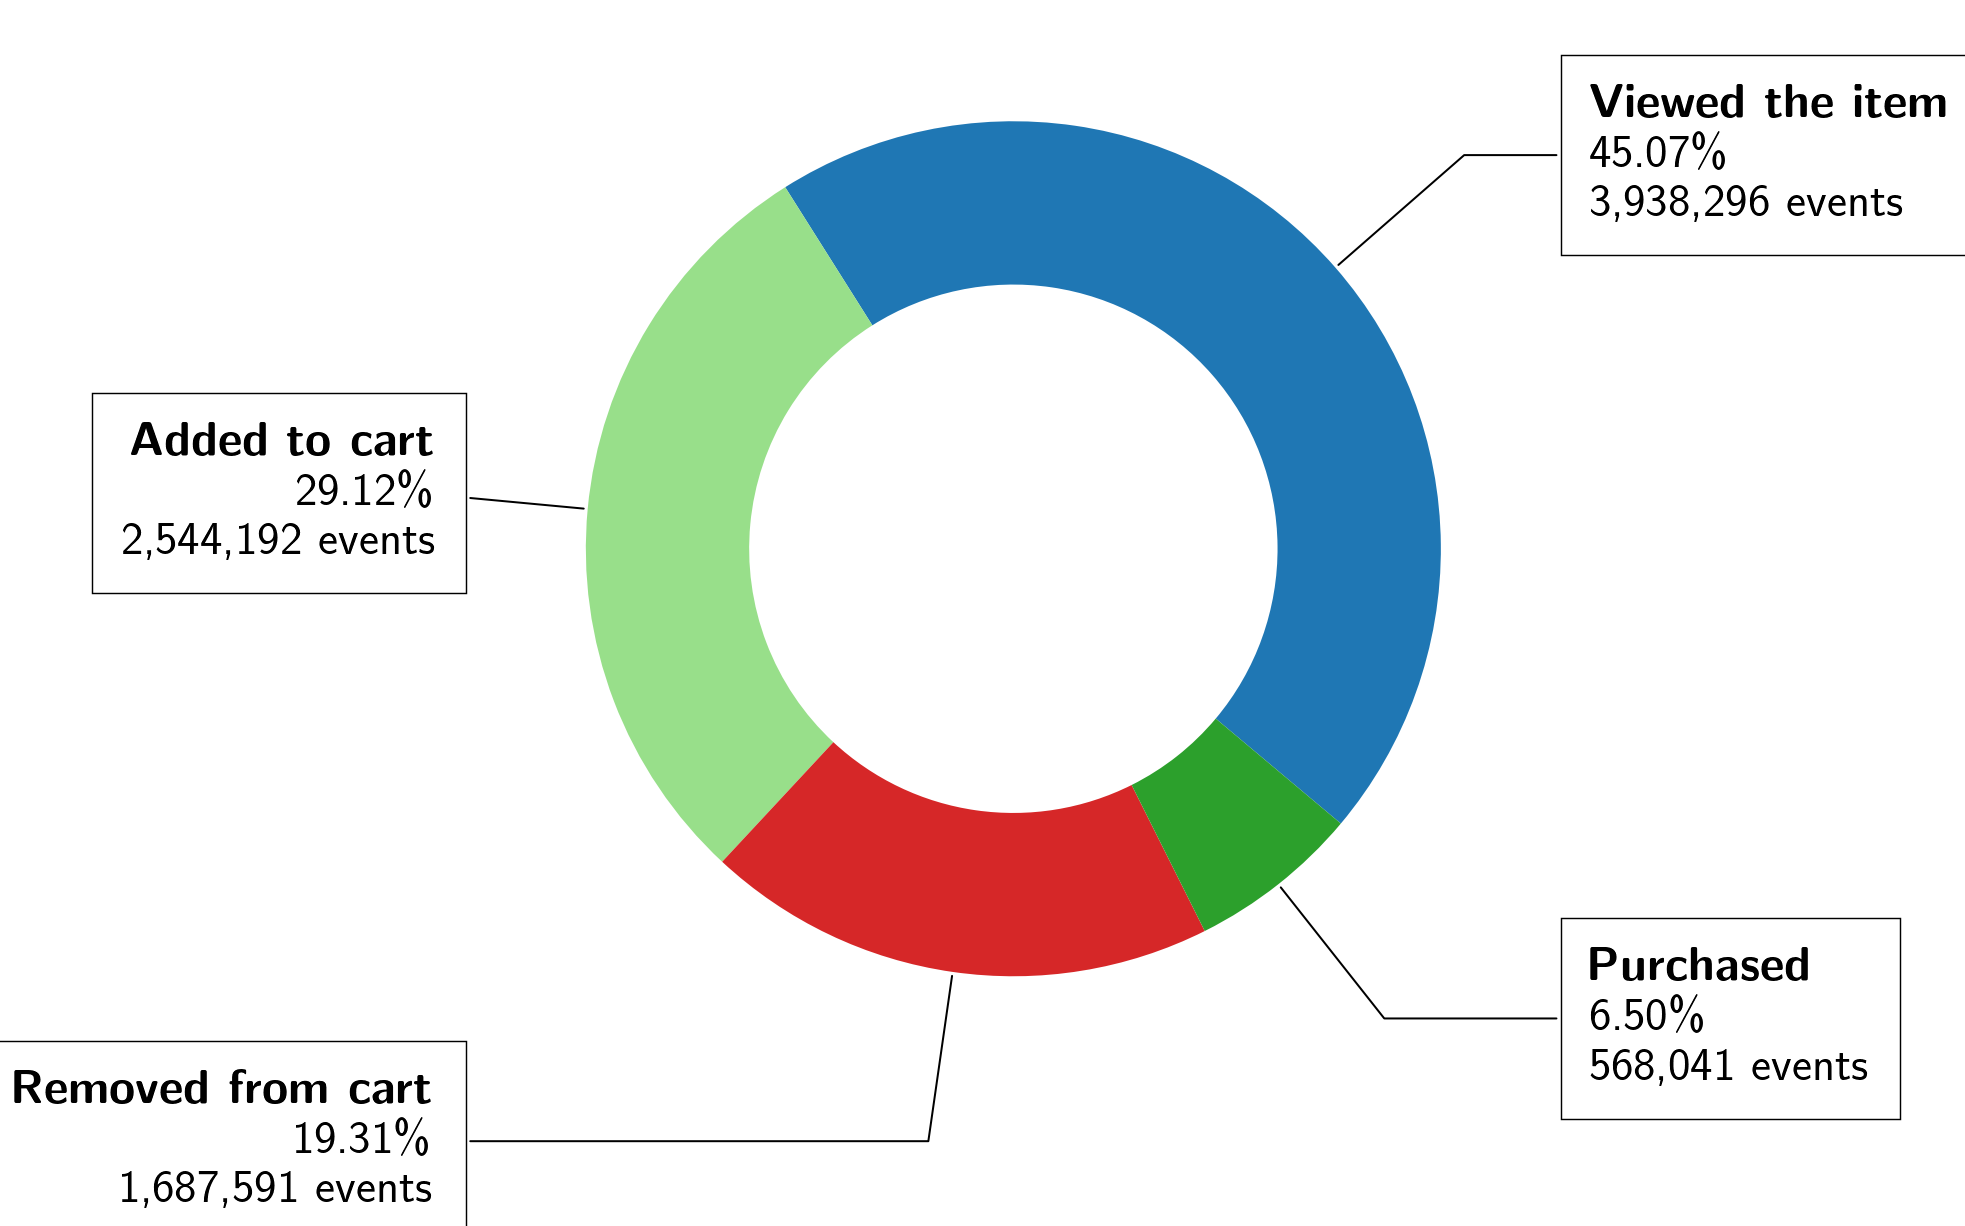

In [11]:
fig, ax = plt.subplots(figsize=(16, 9), subplot_kw=dict(aspect="equal"))
# W - width; P - precision; B - bold; N - normal
W = 2
P = 2
E = 'events'
event_counts = df.event_type.value_counts()
event_perc = df.event_type.value_counts(normalize=True) * 100
event_type_legend = [r"\textbf{Viewed the item}"+f"\n{event_perc['view']:{W}.{P}f}\%\n{event_counts['view']:,} {E}",
                     r"\textbf{Added to cart}"+f"\n{event_perc['cart']:{W}.{P}f}\%\n{event_counts['cart']:,} {E}",
                     r"\textbf{Removed from cart}"+f"\n{event_perc['remove_from_cart']:{W}.{P}f}\%\n{event_counts['remove_from_cart']:,} {E}",
                     r"\textbf{Purchased}"+f"\n{event_perc['purchase']:{W}.{P}f}\%\n{event_counts['purchase']:,} {E}"]

cmap = plt.get_cmap("tab20")
wedges, texts = ax.pie(event_counts, wedgeprops=dict(width=0.382), textprops=dict(color="w"), startangle=-40, colors=cmap([0,5,6,4]))

bbox_props = dict(boxstyle="square,pad=0.618", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(event_type_legend[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
fig.set_facecolor('w')
# ax.set_title("Logged user events")
plt.tight_layout()

fig.savefig(EXPORT_DIR+'percentage-of-events.png',dpi=300)
fig.savefig(EXPORT_DIR+'percentage-of-events.pdf')
plt.show()

*Note:* cart > (remove_from_cart + purchase), because some users simply leave the site with items in cart.

## Categories

In [12]:
category_dict=df[['category_id','product_id']].drop_duplicates()
number_of_products_in_cat = category_dict['category_id'].value_counts()
number_of_products_in_cat

1487580007675986893    2322
1487580013841613016    1820
1487580005595612013    1229
1487580008246412266     967
1487580005671109489     963
                       ... 
1487580010024796212       1
1487580011383750769       1
1487580011224367209       1
1487580008128971748       1
2069171133327868014       1
Name: category_id, Length: 500, dtype: int64

In [13]:
number_of_products_in_cat.describe()

count     500.00000
mean       91.92000
std       194.64961
min         1.00000
25%         8.00000
50%        29.00000
75%        89.50000
max      2322.00000
Name: category_id, dtype: float64

In [14]:
one_item_category = number_of_products_in_cat == 1
sum(one_item_category)

33

In [15]:
sum(number_of_products_in_cat < 8) - sum(one_item_category)

87

In [16]:
sum(number_of_products_in_cat < 4) - sum(one_item_category)

34

*Note (october):* There are 490 unique categories, but 28 of them has only 1 item. 96 categories have more than 1, but less than 8 items. 39 categories have 2 or 3 items in them.

*Note (november):* There are 491 unique categories, but 32 of them has only 1 item. 94 categories have more than 1, but less than 8 items. 33 categories have 2 or 3 items in them.

In [17]:
viewed_categories = df[df.event_type == 'view'].loc[:,['category_id']]
viewes_per_category = viewed_categories.category_id.value_counts()
viewes_per_category 

1487580007675986893    195061
1487580005092295511    160785
1487580005595612013    125707
1602943681873052386    122978
1487580006300255120    107729
                        ...  
1487580010897211483         1
1487580009890578479         1
1487580012231000209         1
1487580011140481125         1
1487580009857024046         1
Name: category_id, Length: 500, dtype: int64

*Note:* We need to make sure, that the number of categories is not higher in *number_of_products_in_cat* than in *views_per_category*. For example, if we view only the data from october  2019 this would be the case.

In [18]:
if len(number_of_products_in_cat) > len(viewes_per_category):
    for i in number_of_products_in_cat.index:
        if i not in viewes_per_category:
            print(f"Category_id not viewed: {i}. First event: {df[df['category_id']==i]['event_type'].iloc[0]}")
            viewes_per_category = viewes_per_category.append(pd.Series([0], index=[i]))
len(viewes_per_category)

500

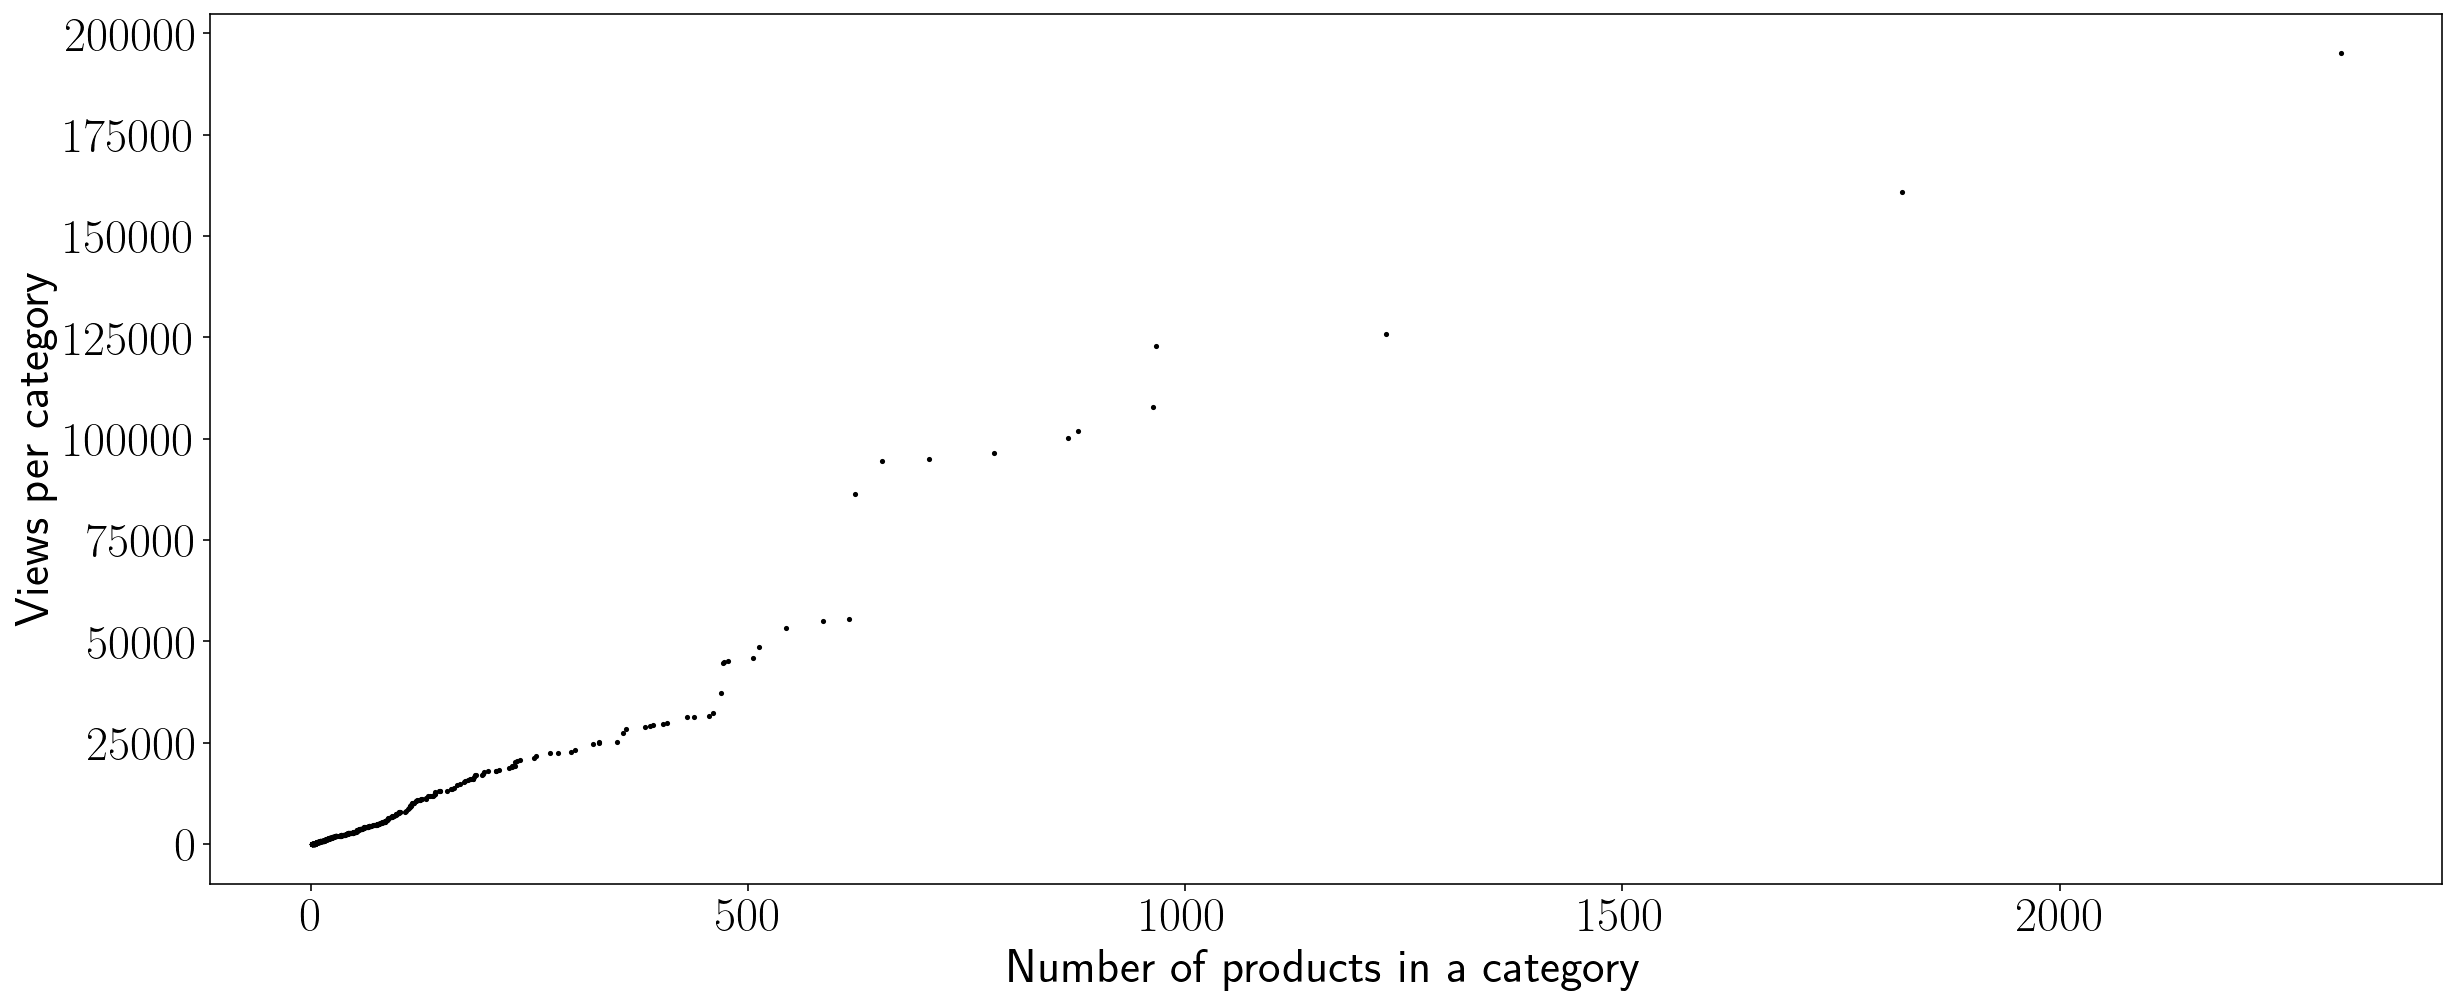

In [19]:
plt.scatter(number_of_products_in_cat, viewes_per_category, marker='.',color='k',s=10)
# plt.title('Views of a category, compared to the number of products in it.')
plt.xlabel('Number of products in a category')
plt.ylabel('Views per category')
plt.savefig(fname=EXPORT_DIR+'views-num-products.png',dpi=300)
plt.savefig(fname=EXPORT_DIR+'views-num-products.pdf')
plt.show()

In [20]:
print(f"There is a strong positive correlation between the number of products in a category and the number of views the category gets.")
print(f"The Pearson product-moment correlation coefficient is R={np.corrcoef(number_of_products_in_cat, viewes_per_category)[0,1]:.4f}.")

There is a strong positive correlation between the number of products in a category and the number of views the category gets.
The Pearson product-moment correlation coefficient is R=0.9798.


In [21]:
users = df['user_id'].value_counts()

In [22]:
users.describe()

count    713100.000000
mean         12.253709
std          54.649878
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max       11786.000000
Name: user_id, dtype: float64

In [23]:
users_events_crosstab=pd.crosstab(df['user_id'],df['event_type'])
users_events_crosstab.sort_values(by='view',ascending=False)

event_type,cart,purchase,remove_from_cart,view
user_id,,,,
527021202,1682,0,702,9402
550388516,5,0,12,7251
557616099,92,6,59,3824
557956487,130,17,85,2745
352394658,116,48,85,2605
...,...,...,...,...
555003906,1,0,0,0
572340927,1,0,0,0
554996519,4,0,0,0


### The events of the most active user

In [24]:
users_events_crosstab.loc[users.index[0]]

event_type
cart                1682
purchase               0
remove_from_cart     702
view                9402
Name: 527021202, dtype: int64

### The events of the 2nd most active user

In [25]:
users_events_crosstab.loc[users.index[1]]

event_type
cart                   5
purchase               0
remove_from_cart      12
view                7251
Name: 550388516, dtype: int64

### The events of the 3rd most active user

In [26]:
users_events_crosstab.loc[users.index[2]]

event_type
cart                1440
purchase              58
remove_from_cart    2659
view                 318
Name: 552908674, dtype: int64

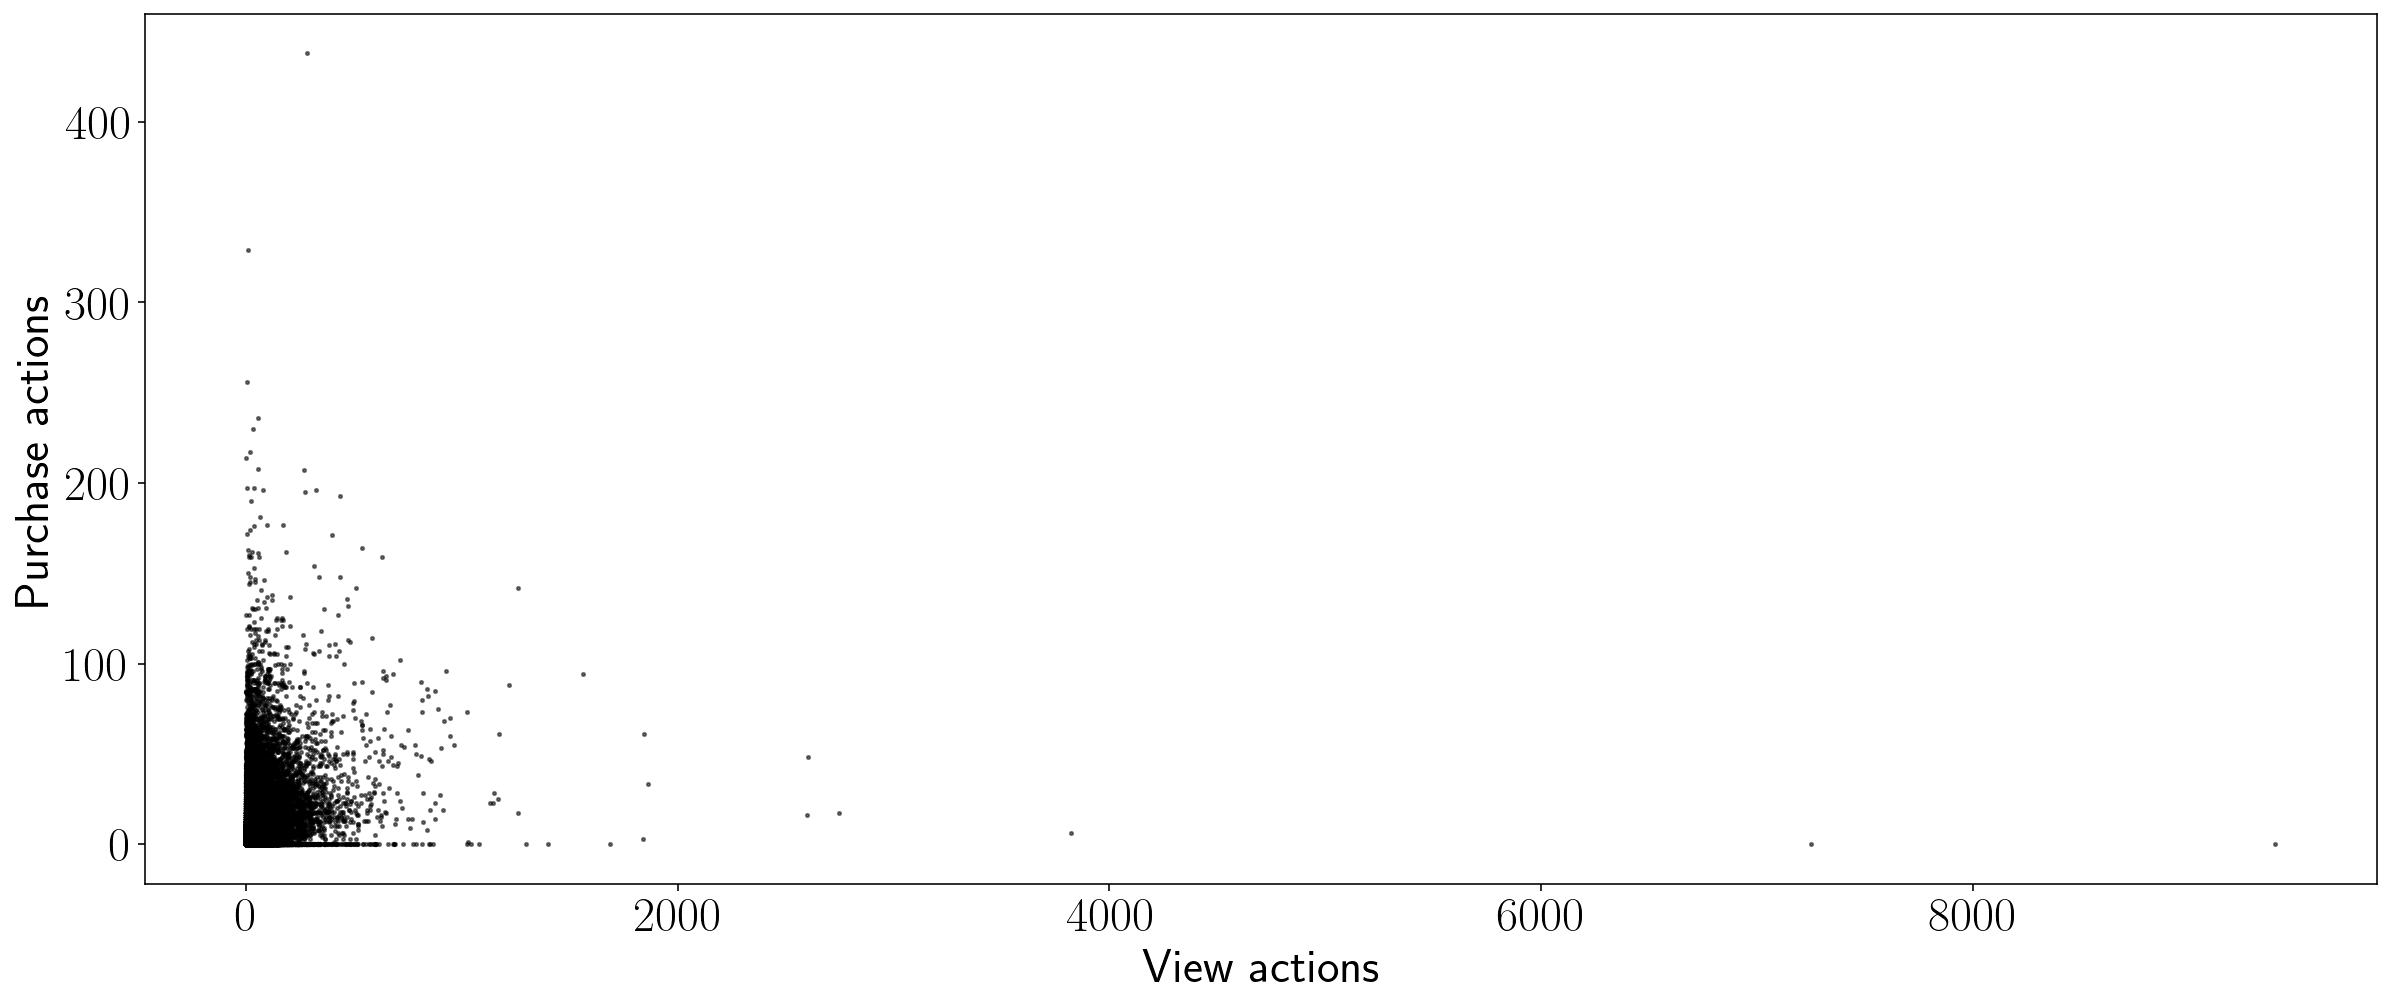

In [27]:
plt.scatter(users_events_crosstab['view'], users_events_crosstab['purchase'], marker='.',color='k',alpha=0.5,s=10)
# plt.title('Number of views and number of purchase actions for the same user.')
plt.xlabel('View actions')
plt.ylabel('Purchase actions')
plt.savefig(EXPORT_DIR+'view-purchase-per-user.png',dpi=300)
plt.savefig(EXPORT_DIR+'view-purchase-per-user.pdf')
plt.show()

In [28]:
print(f"The Pearson product-moment correlation coefficient is R={np.corrcoef(users_events_crosstab['view'], users_events_crosstab['purchase'])[0,1]:.4f}.")

The Pearson product-moment correlation coefficient is R=0.3493.


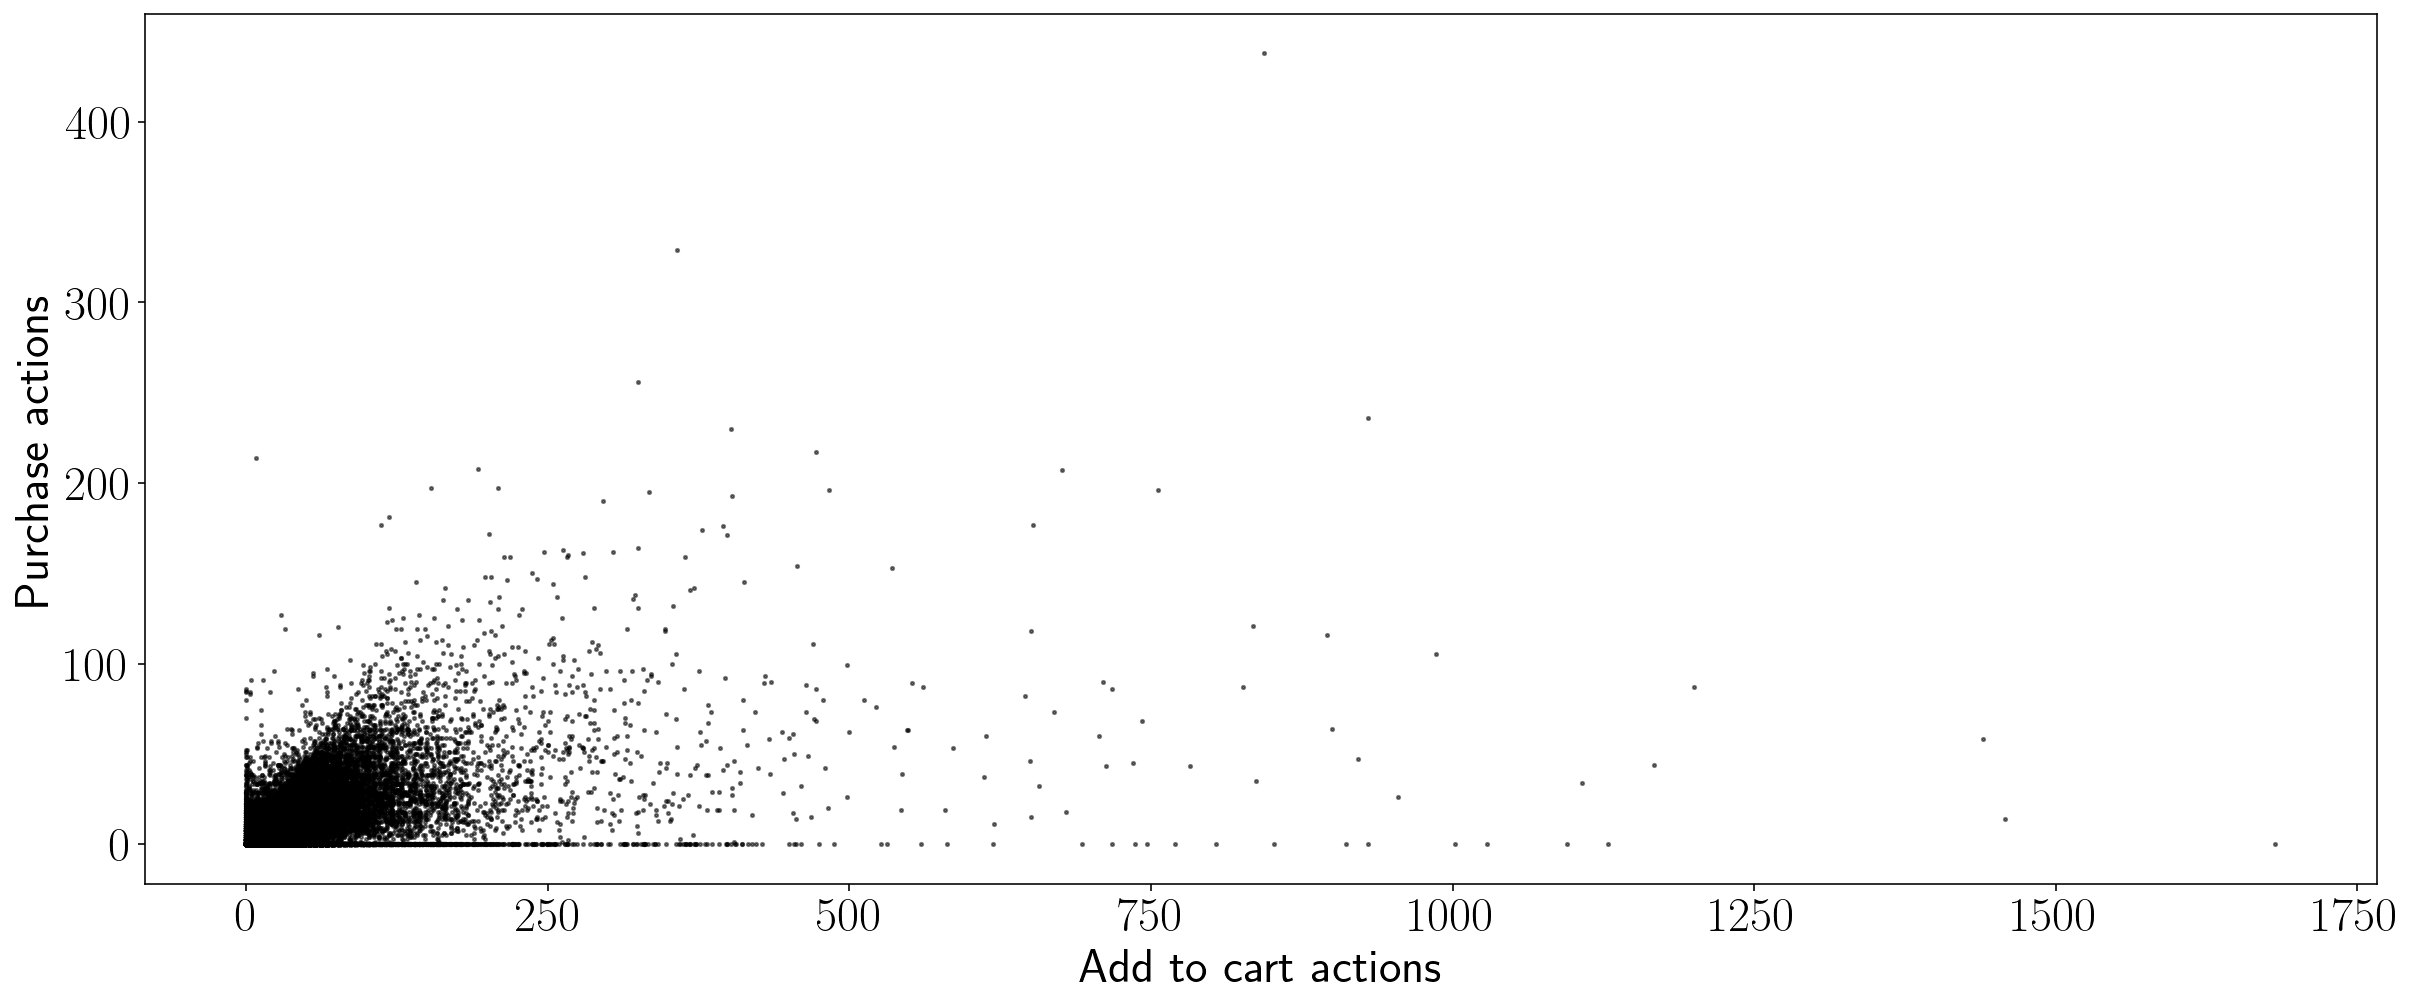

In [29]:
plt.scatter(users_events_crosstab['cart'], users_events_crosstab['purchase'], marker='.',color='k',alpha=0.5,s=10)
# plt.title('Number of add to cart actions and number of purchase actions for the same user.')
plt.xlabel('Add to cart actions')
plt.ylabel('Purchase actions')
plt.savefig(EXPORT_DIR+'cart-purchase-per-user.png',dpi=300)
plt.savefig(EXPORT_DIR+'cart-purchase-per-user.pdf')
plt.show()

In [30]:
print(f"The Pearson product-moment correlation coefficient is R={np.corrcoef(users_events_crosstab['cart'], users_events_crosstab['purchase'])[0,1]:.4f}.")

The Pearson product-moment correlation coefficient is R=0.6249.


## A single user's journey during a session

In [31]:
sample = df.user_session.sample(n=1,random_state=SEED).item()
df.loc[df.user_session == sample].sort_values(by='event_time')

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1802074,2019-10-13 19:10:27,cart,5859406,1487580005671109489,NaN,masura,2.37,543406757,d3837fcf-958c-4bf4-8c61-e5d4a211739e
1802221,2019-10-13 19:11:18,cart,5727536,1487580004882580302,NaN,NaN,2.70,543406757,d3837fcf-958c-4bf4-8c61-e5d4a211739e
1802307,2019-10-13 19:11:44,cart,5560994,1487580005595612013,NaN,NaN,3.00,543406757,d3837fcf-958c-4bf4-8c61-e5d4a211739e
1802354,2019-10-13 19:12:07,view,5835755,1487580005268456287,NaN,NaN,6.35,543406757,d3837fcf-958c-4bf4-8c61-e5d4a211739e
1802433,2019-10-13 19:12:44,cart,5859412,1487580005671109489,NaN,masura,2.37,543406757,d3837fcf-958c-4bf4-8c61-e5d4a211739e
...,...,...,...,...,...,...,...,...,...
1805833,2019-10-13 19:32:18,remove_from_cart,5560994,1487580005595612013,NaN,NaN,3.00,543406757,d3837fcf-958c-4bf4-8c61-e5d4a211739e
1805832,2019-10-13 19:32:18,remove_from_cart,5560994,1487580005595612013,NaN,NaN,3.00,543406757,d3837fcf-958c-4bf4-8c61-e5d4a211739e
1805837,2019-10-13 19:32:19,remove_from_cart,5727536,1487580004882580302,NaN,NaN,2.70,543406757,d3837fcf-958c-4bf4-8c61-e5d4a211739e
1805842,2019-10-13 19:32:21,remove_from_cart,5859406,1487580005671109489,NaN,masura,2.37,543406757,d3837fcf-958c-4bf4-8c61-e5d4a211739e


## Traffic fluctuation during the observed daterange

In [32]:
fluct = df.loc[:,['event_time','user_id']]
fluct['day'] = fluct['event_time'].apply(lambda s: str(s)[0:10])

In [33]:
daily_visitors = fluct.drop_duplicates().groupby(['day'])['user_id'].agg(['count']).sort_values(by=['day'], ascending=True)
daily_visitors.head()

,count
day,
2019-10-01,126245
2019-10-02,181132
2019-10-03,109820
2019-10-04,102356
2019-10-05,94707


In [34]:
X = pd.Series(daily_visitors.index.values).apply(lambda s: dt.strptime(s, '%Y-%m-%d').date())

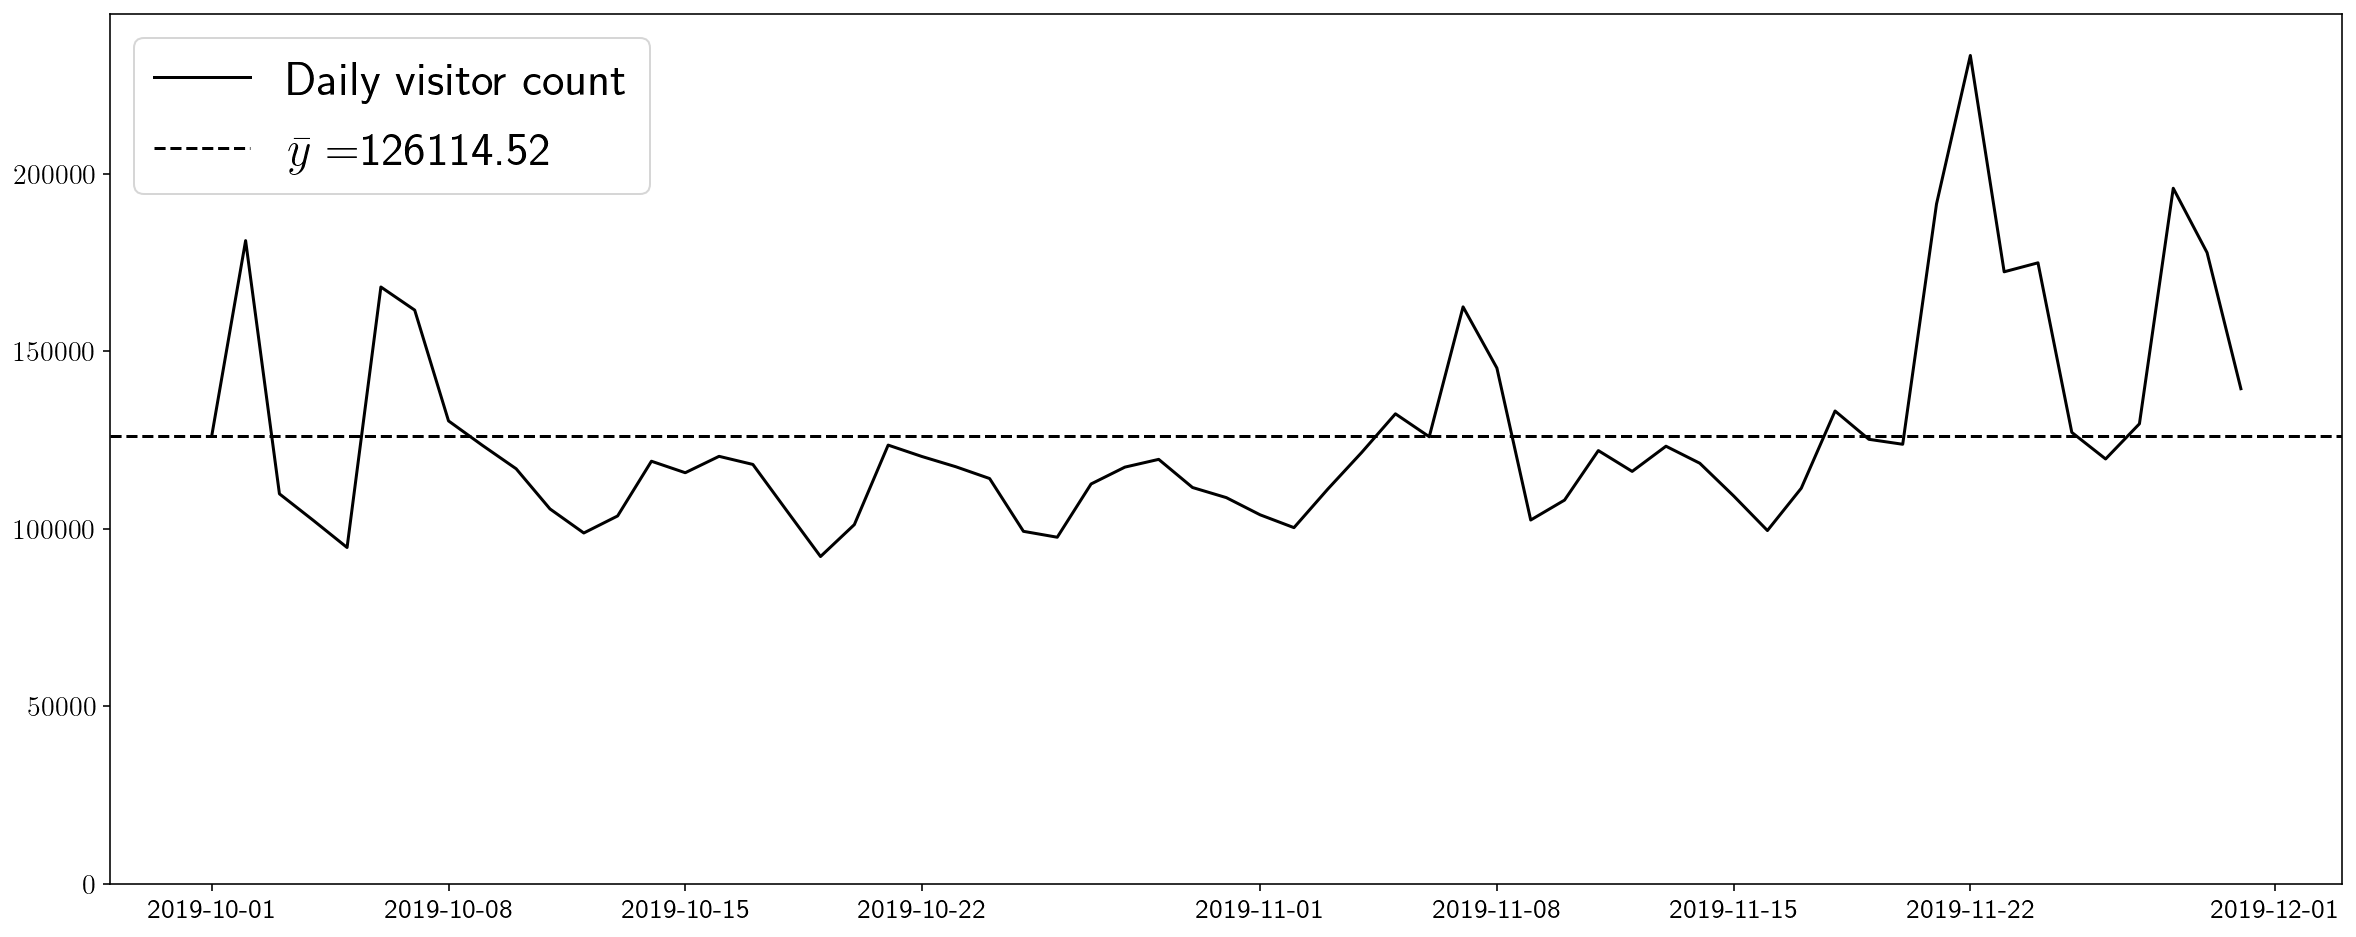

In [35]:
ax = plt.subplot()

plt.plot(X,daily_visitors['count'],color='k')
plt.ylim((0,daily_visitors['count'].max()*1.05))
plt.axhline(y = daily_visitors.mean()[0],linestyle='--', color='k')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

plt.legend(['Daily visitor count', r"$\bar{y}=$"+f"{daily_visitors.mean()[0]:.2f}"])
plt.savefig(EXPORT_DIR+'daily-visitor-count.png',dpi=300)
plt.savefig(EXPORT_DIR+'daily-visitor-count.pdf')
plt.show()

## Visitors

In [36]:
print(f'Total number of visitors in the observed data-range: {daily_visitors.sum().item():,}')

Total number of visitors in the observed data-range: 7,692,986


In [37]:
print(f'Total number of unique visitors in the observed data-range: {len(df.user_id.unique()):,}')

Total number of unique visitors in the observed data-range: 713,100


In [38]:
visitors = df.user_id.value_counts()
visitors

527021202    11786
550388516     7268
552908674     4475
510369366     4069
500179293     4037
             ...  
555175408        1
558491173        1
529104438        1
478895730        1
565205492        1
Name: user_id, Length: 713100, dtype: int64

In [39]:
visitors.describe()

count    713100.000000
mean         12.253709
std          54.649878
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max       11786.000000
Name: user_id, dtype: float64

In [40]:
print(f"Number of events with missing user_id: {len(df[df.user_id.isnull()])}")

Number of events with missing user_id: 0


In [41]:
def number_of_visitors_with_n_events(v, first_n = 50):
    visitors_event_number = pd.Series(dtype='int32')
    for i in range(1,first_n):
        visitors_event_number[str(i)] = v[i]
    visitors_event_number[str(first_n) + '+'] = v[first_n-1:].sum()
    all_users = len(df.user_id.unique())
    assert visitors_event_number.sum() == all_users, "The total number of unique users must be the same, regardless of clustering by event number."
    print('\033[1m n  | Visitors with n events\033[0m')
    for index, value in visitors_event_number.items():
        if index == str(first_n) + '+':
            print(f"{index:3} |{value:7} ({value*100/all_users:5.2f}%)")
        elif (int(index) < 6) or (int(index) > first_n-5):
            print(f"{int(index):2}  |{value:7} ({value*100/all_users:5.2f}%)")
        elif (int(index) == 6):
            print('...')
    return visitors_event_number

 n  | Visitors with n events
 1  | 315120 (44.19%)
 2  |  96143 (13.48%)
 3  |  47130 ( 6.61%)
 4  |  77115 (10.81%)
 5  |  19545 ( 2.74%)
...
46  |    788 ( 0.11%)
47  |    759 ( 0.11%)
48  |    716 ( 0.10%)
49  |    704 ( 0.10%)
50+ |  36850 ( 5.17%)



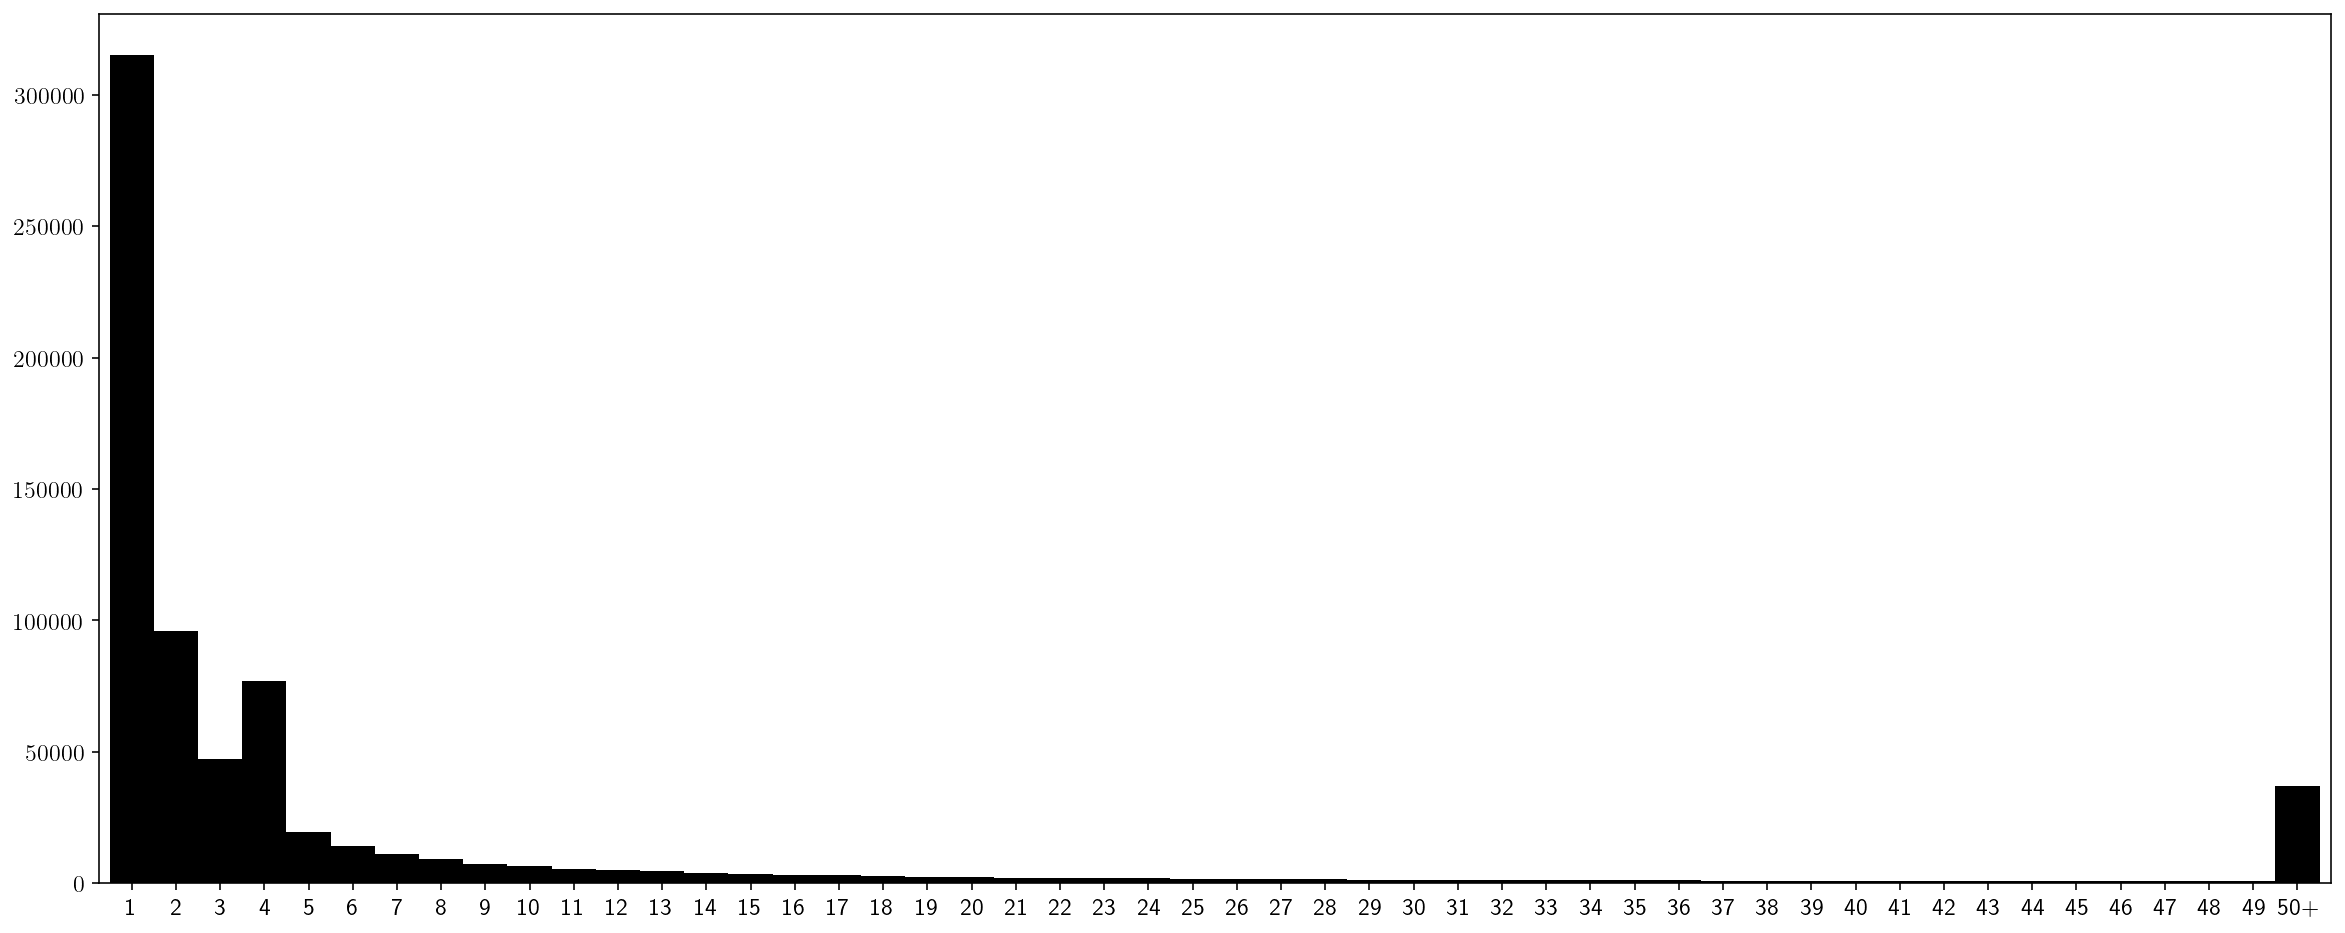

In [42]:
ax = number_of_visitors_with_n_events(visitors.value_counts().sort_index()).plot.bar(rot=0,width=1,color='k')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
print('')
plt.savefig(EXPORT_DIR+'visitors_with_50_events.png',dpi=300)
plt.savefig(EXPORT_DIR+'visitors_with_50_events.pdf')
plt.show()

 n  | Visitors with n events
 1  | 315120 (44.19%)
 2  |  96143 (13.48%)
 3  |  47130 ( 6.61%)
 4  |  77115 (10.81%)
5+  | 177592 (24.90%)



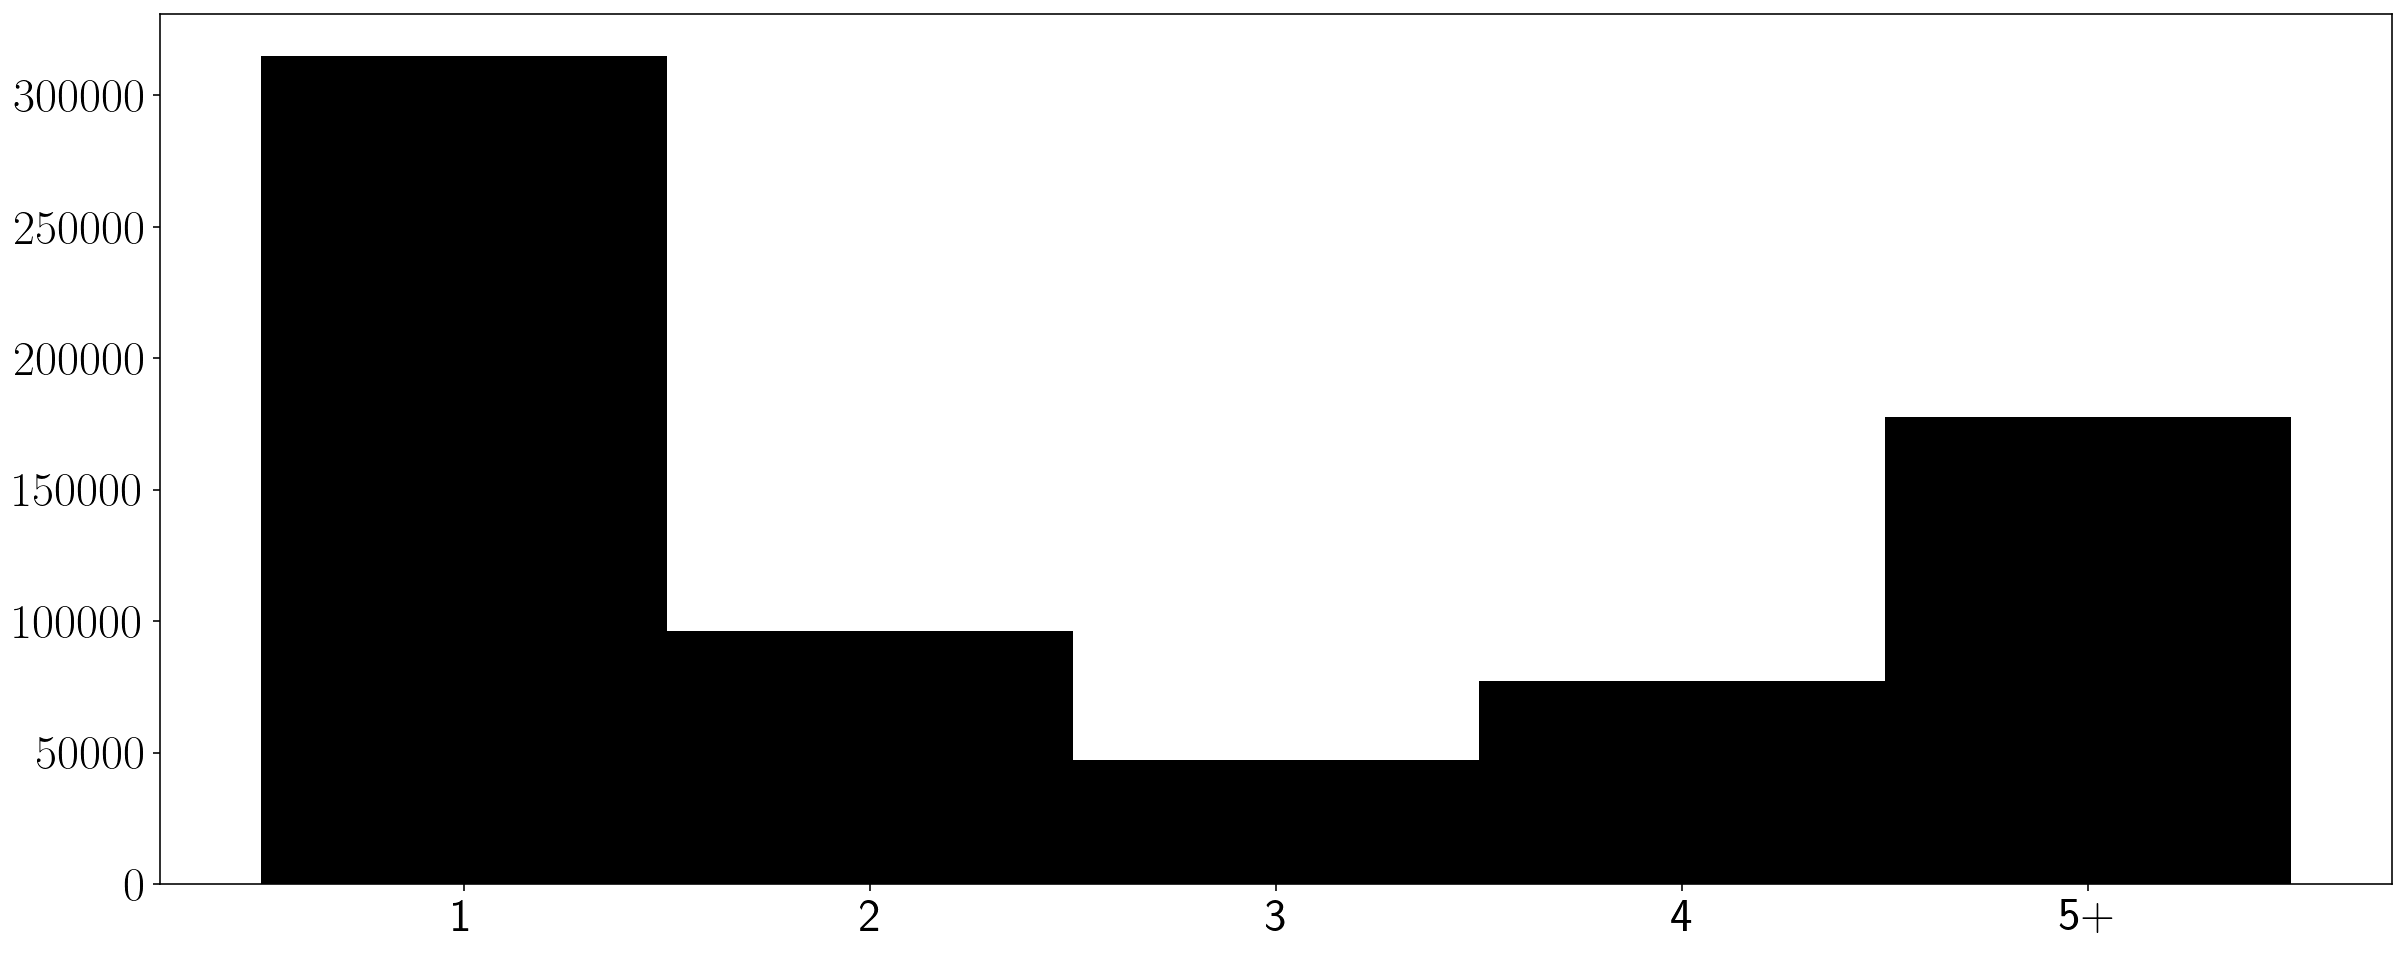

In [43]:
ax = number_of_visitors_with_n_events(visitors.value_counts().sort_index(),5).plot.bar(rot=0,width=1,color='k')
print('')
plt.savefig(EXPORT_DIR+'visitors_with_5_events.png',dpi=300)
plt.savefig(EXPORT_DIR+'visitors_with_5_events.pdf')
plt.show()

 n  | Visitors with n events
 1  | 315120 (44.19%)
 2  |  96143 (13.48%)
 3  |  47130 ( 6.61%)
 4  |  77115 (10.81%)
 5  |  19545 ( 2.74%)
 6  |  14349 ( 2.01%)
 7  |  11194 ( 1.57%)
 8  |   9081 ( 1.27%)
 9  |   7502 ( 1.05%)
10+ | 115921 (16.26%)



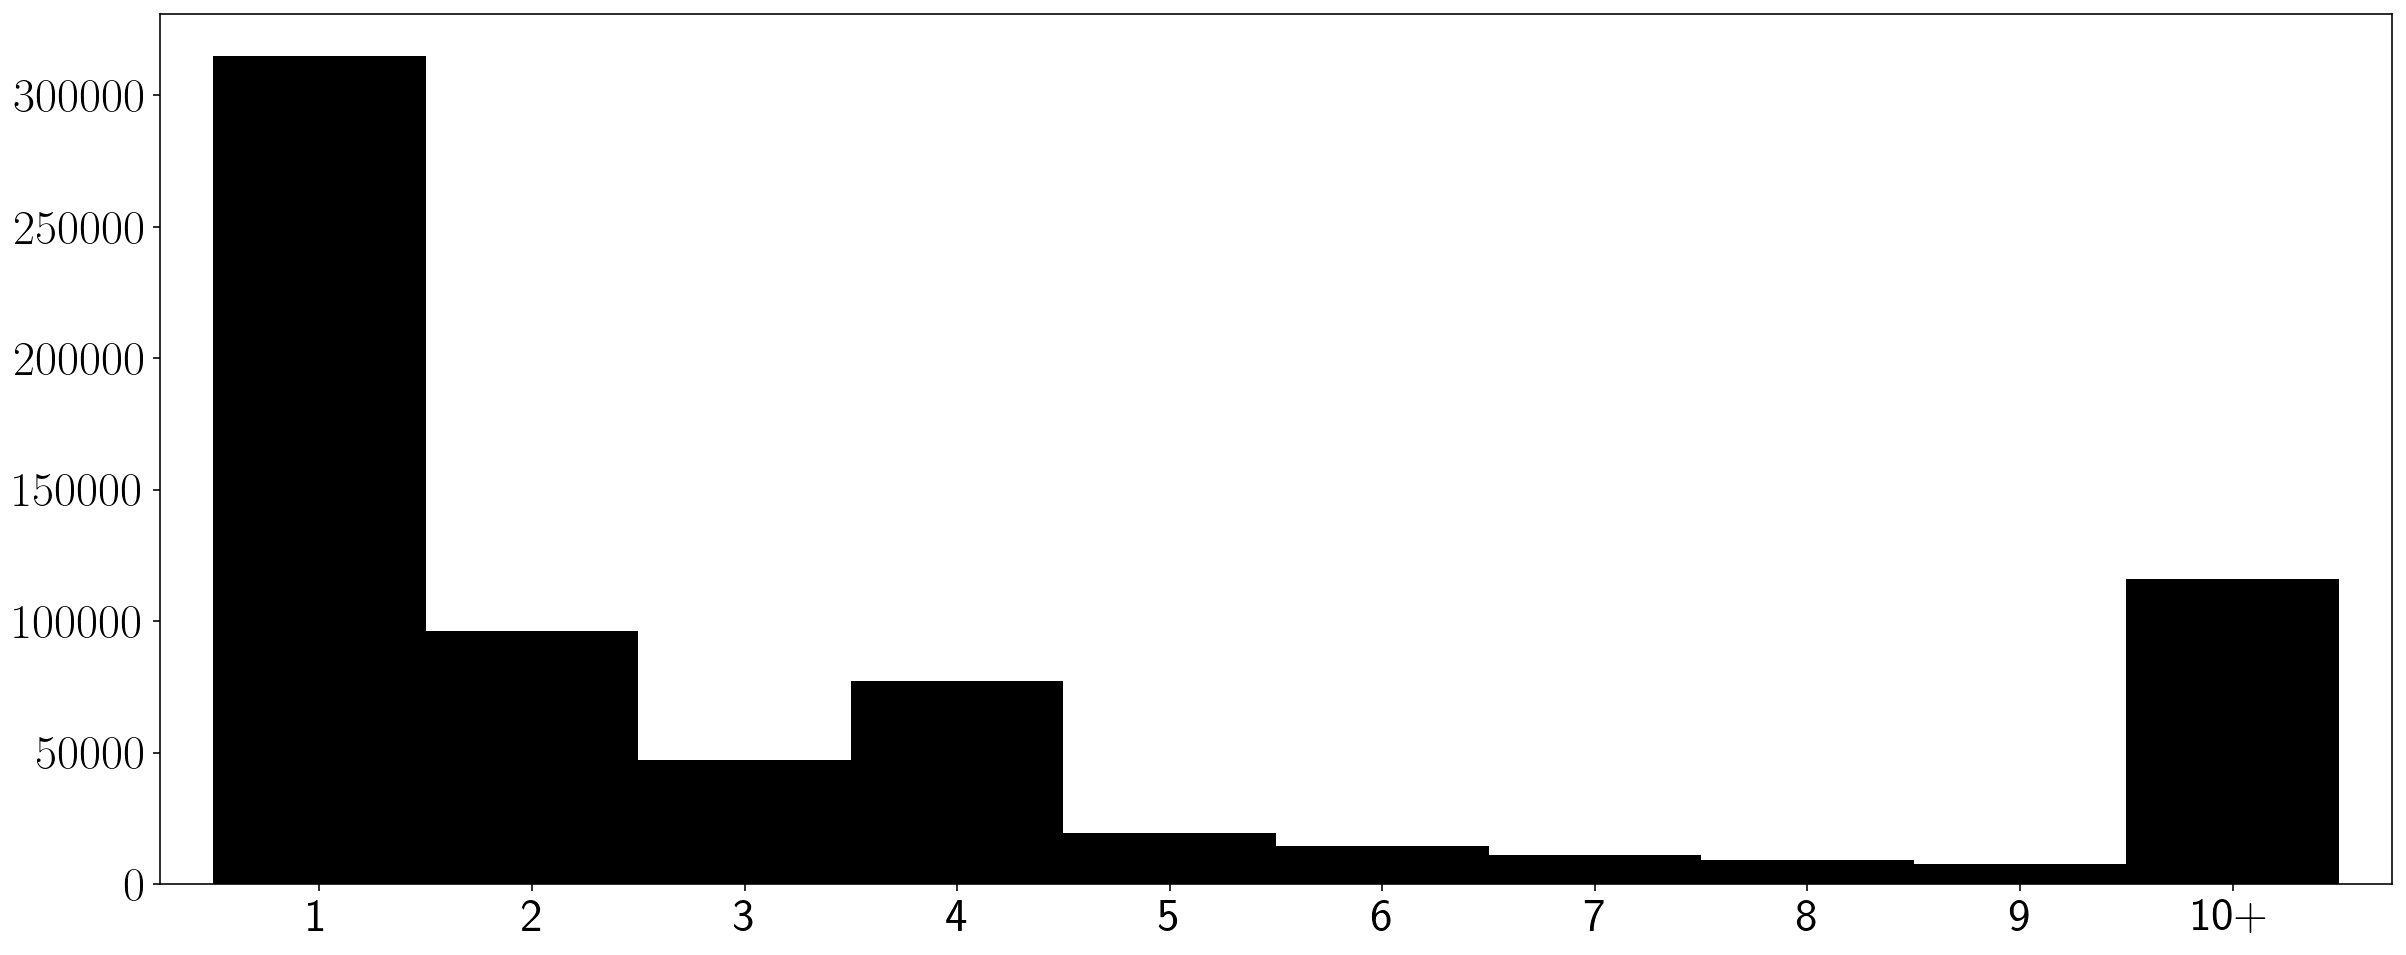

In [44]:
ax = number_of_visitors_with_n_events(visitors.value_counts().sort_index(),10).plot.bar(rot=0,width=1,color='k')
print('')
plt.show()

 n  | Visitors with n events
 1  | 315120 (44.19%)
 2  |  96143 (13.48%)
 3  |  47130 ( 6.61%)
 4  |  77115 (10.81%)
 5  |  19545 ( 2.74%)
...
66  |    426 ( 0.06%)
67  |    409 ( 0.06%)
68  |    381 ( 0.05%)
69  |    376 ( 0.05%)
70+ |  26589 ( 3.73%)



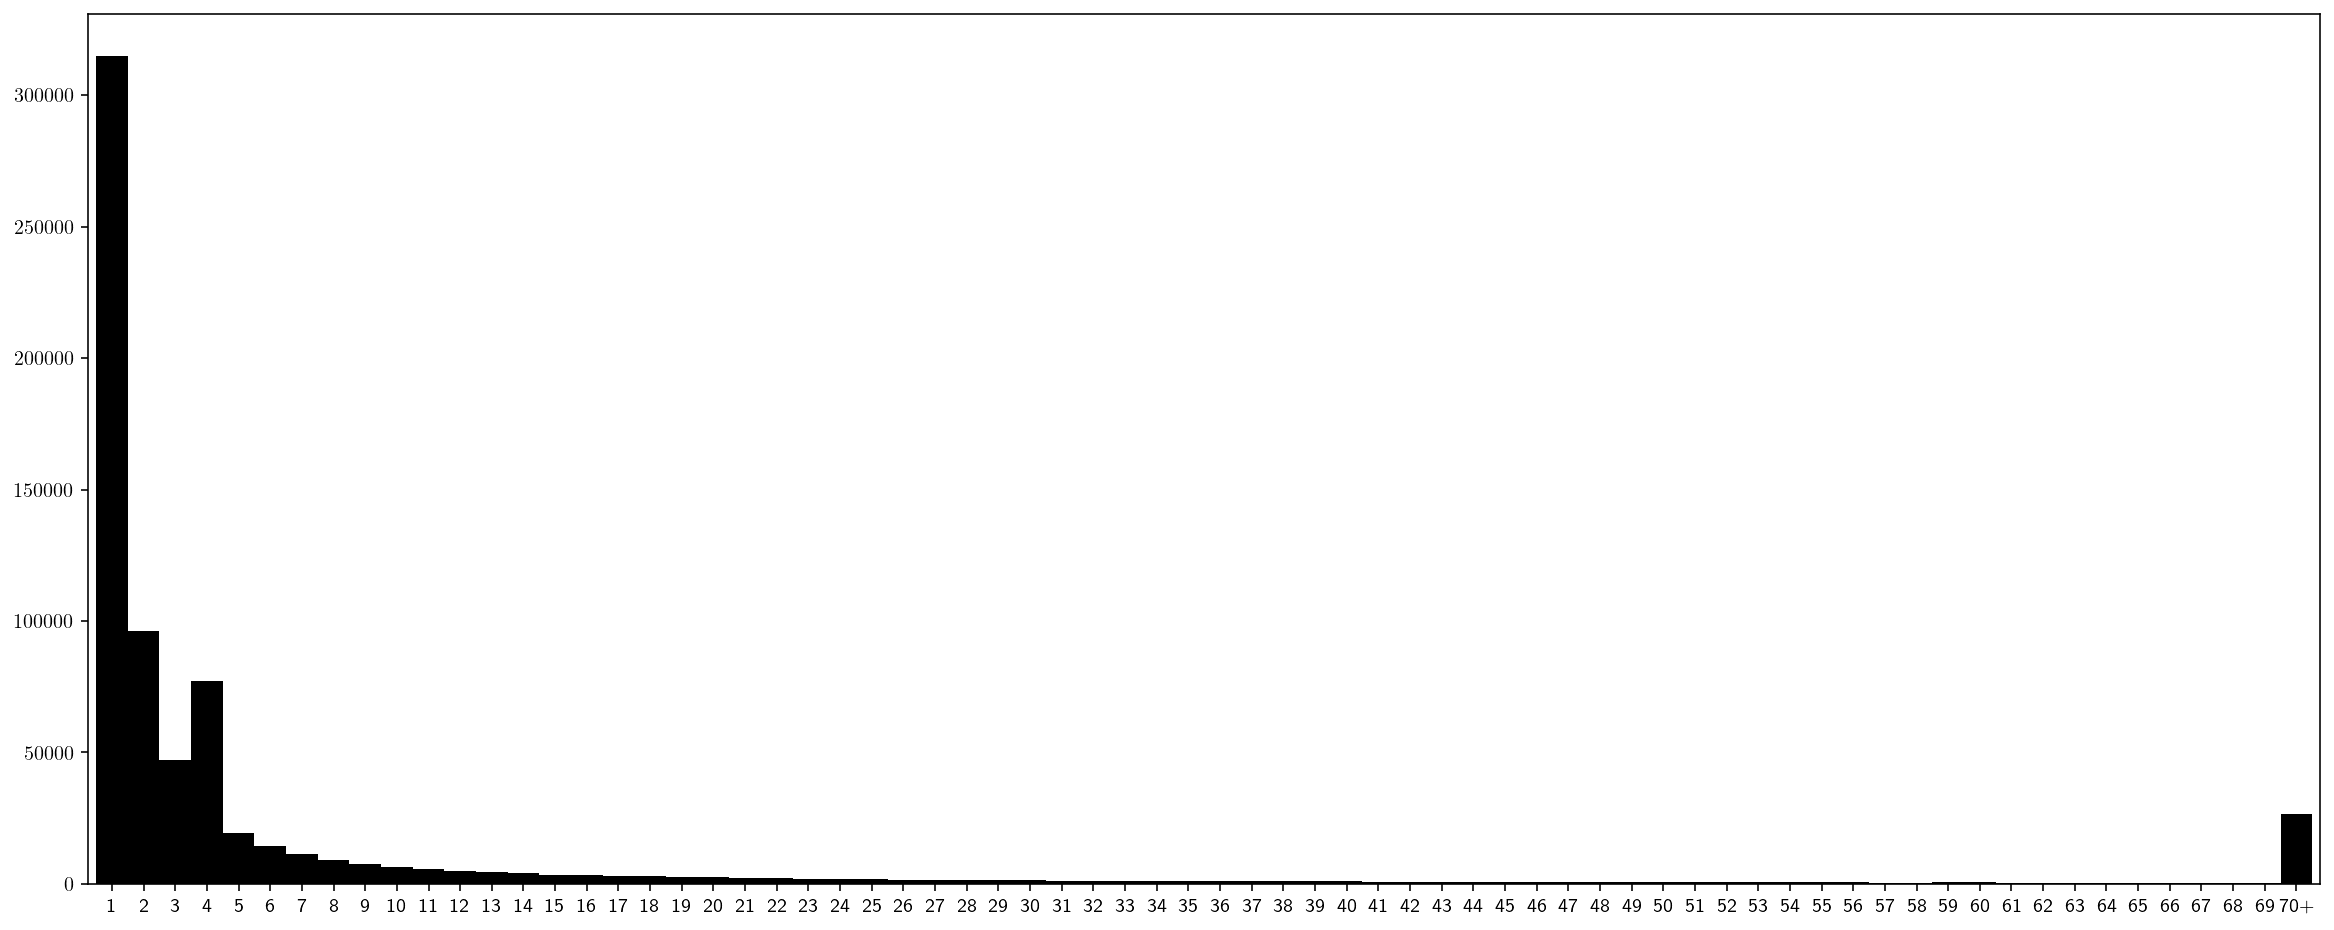

In [45]:
ax = number_of_visitors_with_n_events(visitors.value_counts().sort_index(),70).plot.bar(rot=0,width=1,color='k')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)
print('')
plt.show()

## Products

In [46]:
print(f'Total number of unique products in the observed data-range: {len(df.product_id.unique()):,}')

Total number of unique products in the observed data-range: 45,960


In [47]:
products = df.product_id.value_counts()
products

5809910    41903
5700037    21143
5809912    20431
5751422    19190
5751383    18874
           ...  
5610042        1
33848          1
5873039        1
5683804        1
5691780        1
Name: product_id, Length: 45960, dtype: int64

In [48]:
products_viewed = df[df.event_type=='view'].product_id.value_counts()
products_viewed

5809910    27287
5892179    12400
5886282    12326
5877454    11558
5809912    11316
           ...  
5891953        1
5682840        1
5680795        1
5560020        1
5777179        1
Name: product_id, Length: 45508, dtype: int64

In [49]:
products_cart = df[df.event_type=='cart'].product_id.value_counts()
products_cart

5700037    11681
5802432    10625
5854897    10049
5809910     8705
5686925     7426
           ...  
5805456        1
5906516        1
5908798        1
5808981        1
87570          1
Name: product_id, Length: 38713, dtype: int64

In [50]:
products_purchase = df[df.event_type=='purchase'].product_id.value_counts()
products_purchase

5809910    2449
5854897    1865
5751422    1578
5700037    1568
5802432    1445
           ... 
5833141       1
5661273       1
5827464       1
5878691       1
5854166       1
Name: product_id, Length: 33172, dtype: int64

In [51]:
products_removed = df[df.event_type=='remove_from_cart'].product_id.value_counts()
products_removed

5809910    3462
5700037    3073
5809912    3018
5751422    2894
5802432    2840
           ... 
5799914       1
5816583       1
5878689       1
5753821       1
5816891       1
Name: product_id, Length: 37817, dtype: int64

## Products - events crosstab

In [52]:
products_events_crosstab=pd.crosstab(df['product_id'],df['event_type'])

In [53]:
products_events_crosstab.sort_values(by='view',ascending=False)

event_type,cart,purchase,remove_from_cart,view
product_id,,,,
5809910,8705,2449,3462,27287
5892179,740,238,411,12400
5886282,910,205,463,12326
5877454,1622,432,867,11558
5809912,4907,1190,3018,11316
...,...,...,...,...
5802834,0,0,1,0
5905873,5,0,2,0
5802832,0,0,2,0


In [54]:
def number_of_products_cluster(ct,min_views,min_purchases):
    number_of_products = pd.Series(dtype='int32')
    test = pd.DataFrame(columns=['v','c','final'])
    test['v'] = (ct['view'] >= min_views) 
    test['c'] = (ct['purchase'] >= min_purchases)
    test['final'] = test.v & test.c
    
    number_of_products['Drop'] = len(ct[~test['final']])
    number_of_products['Keep'] = len(ct[test['final']])
    
    assert (number_of_products['Drop'] + number_of_products['Keep']) == len(products_events_crosstab), "The total number of unique products must be the same, regardless of clustering."
    title = f"Keep condition: {ENG.no('view',min_views)} and {ENG.no('purchase',min_purchases)} needed to use product data." 
    print(f"\033[1m{title}\033[0m")
    print(f"Drop {number_of_products['Drop']:6} products ({number_of_products['Drop']*100/len(ct):5.2f}%)")
    print(f"Keep {number_of_products['Keep']:6} products ({number_of_products['Keep']*100/len(ct):5.2f}%)")
    
    fig, ax = plt.subplots(figsize=(16, 9), subplot_kw=dict(aspect="equal"))

    ax = number_of_products.plot.pie(
        autopct=lambda p: f"{p:5.2f}\%", 
        wedgeprops=dict(width=0.618),
        textprops=dict(color="w"),
        startangle=-40,
        colors=cmap([6,4])
    )
    ax.legend(title='Preparation',loc='upper right')
    plt.ylabel("")
    plt.title(title)
    fig.set_facecolor('w')
    print('')
    plt.show()  

Keep condition: 1 view and no purchases needed to use product data.
Drop    452 products ( 0.98%)
Keep  45508 products (99.02%)



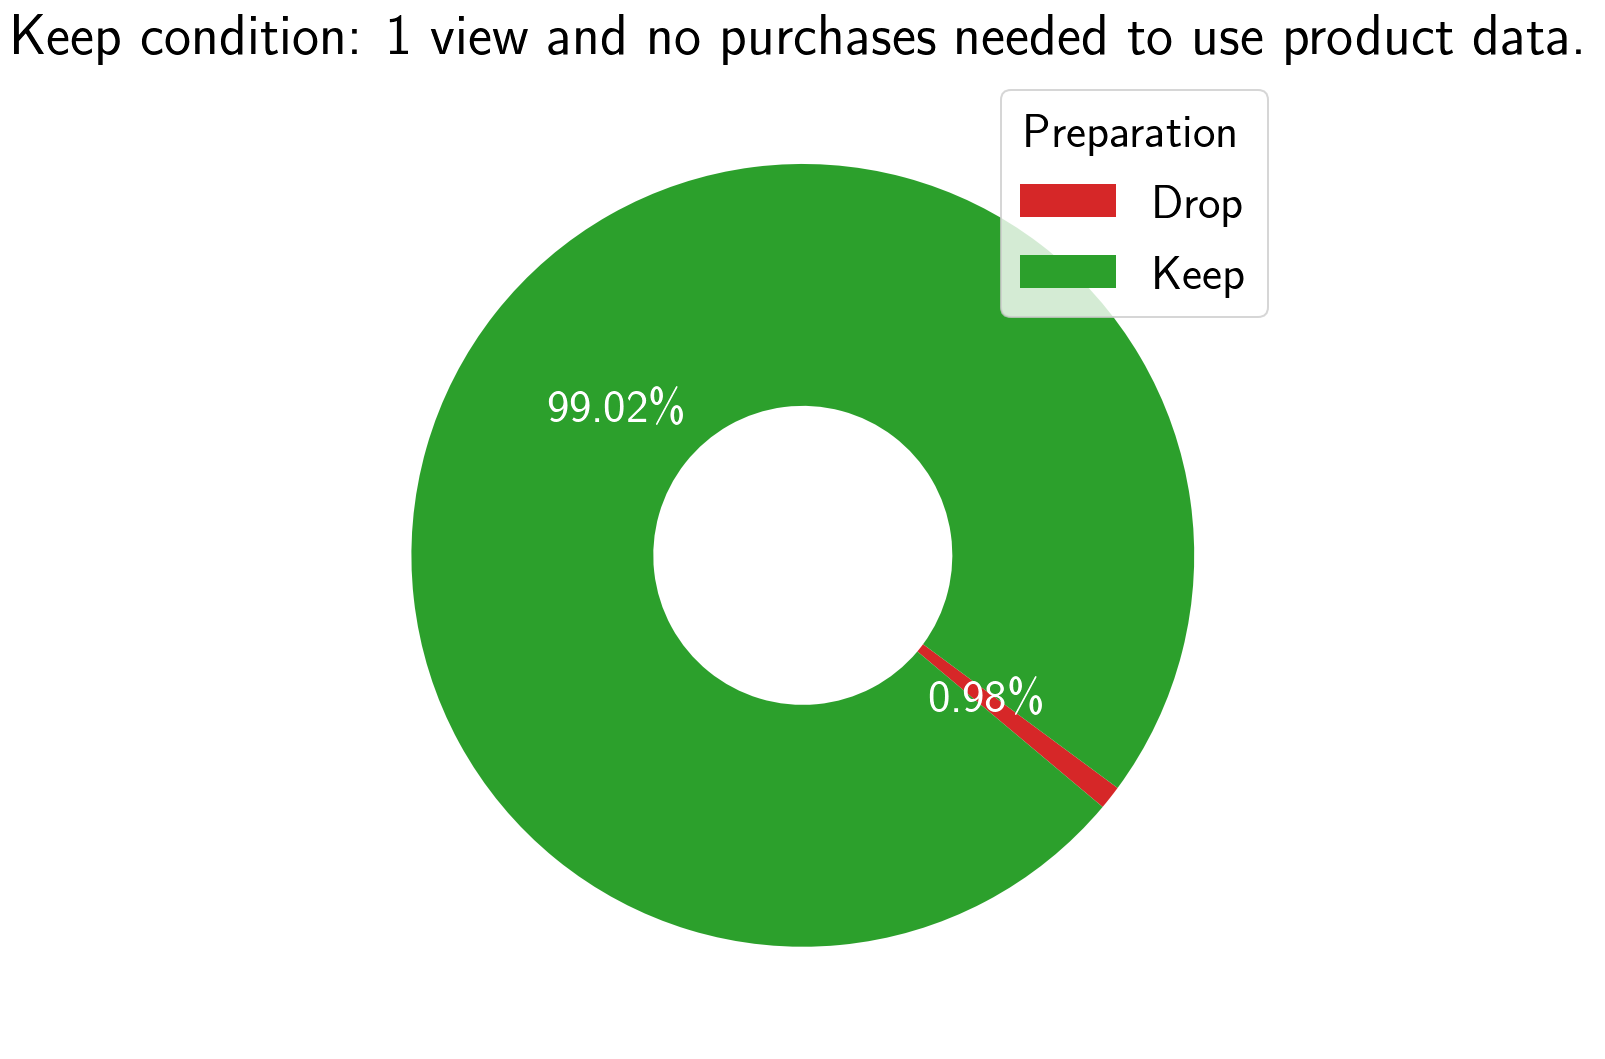

In [55]:
number_of_products_cluster(products_events_crosstab,1,0)

Keep condition: no views and 1 purchase needed to use product data.
Drop  12788 products (27.82%)
Keep  33172 products (72.18%)



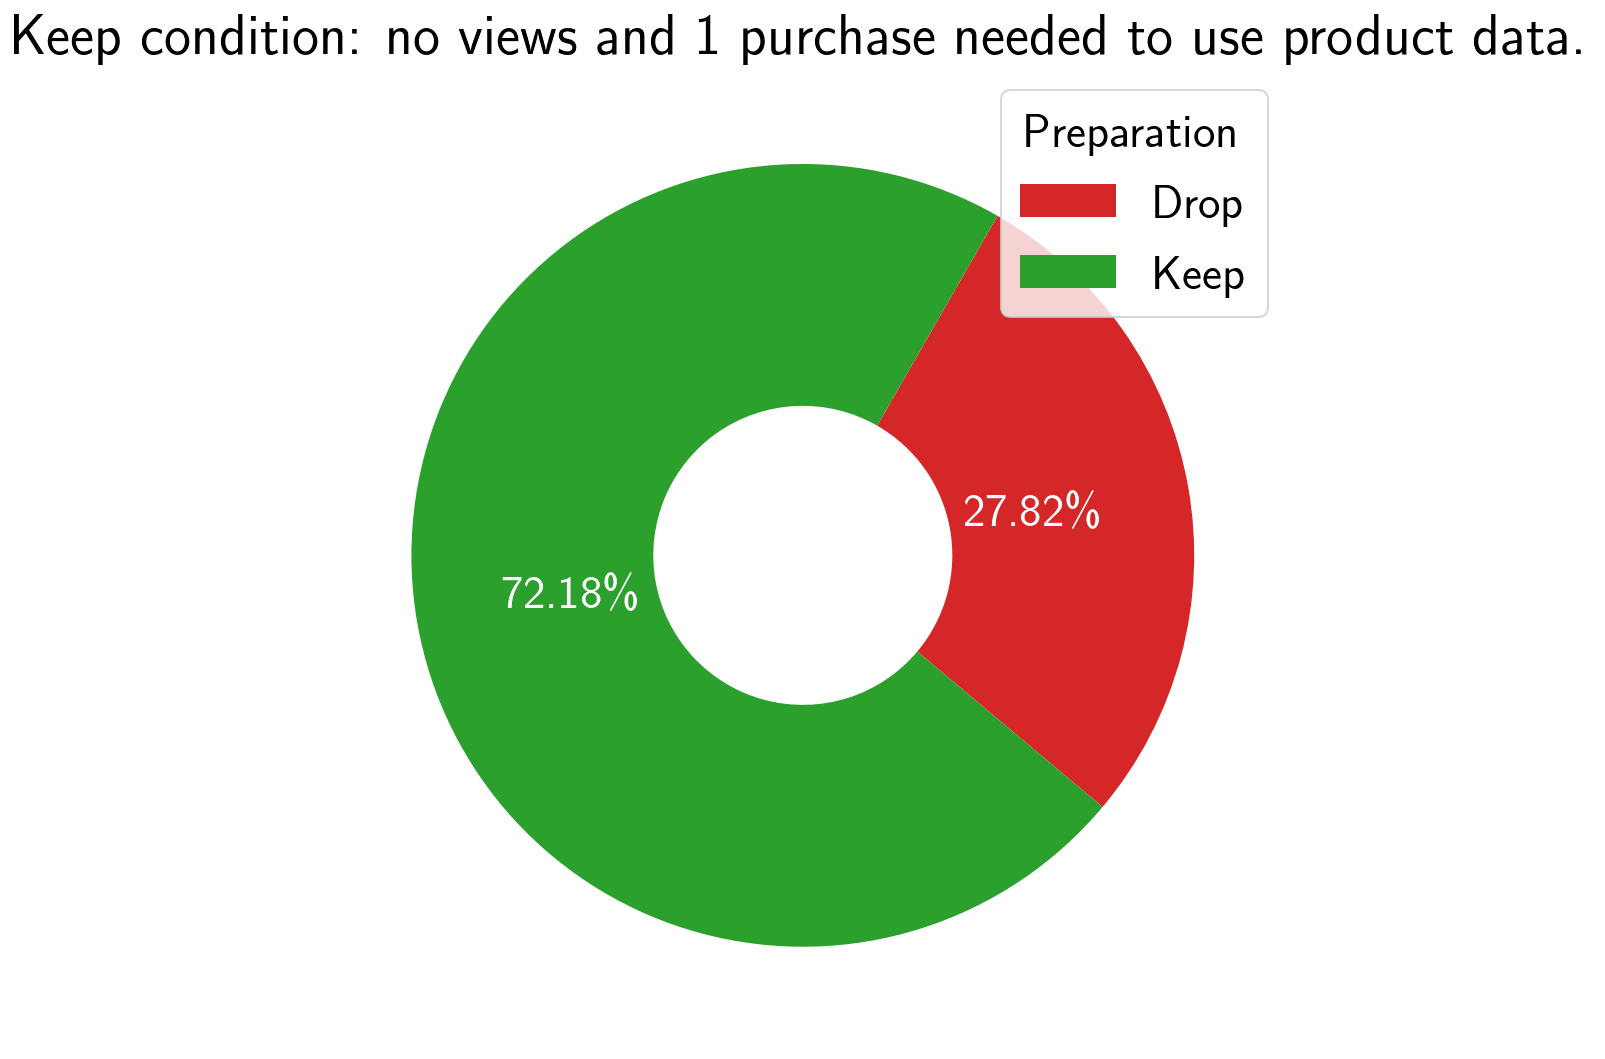

In [56]:
number_of_products_cluster(products_events_crosstab,0,1)

Keep condition: 1 view and 1 purchase needed to use product data.
Drop  12882 products (28.03%)
Keep  33078 products (71.97%)



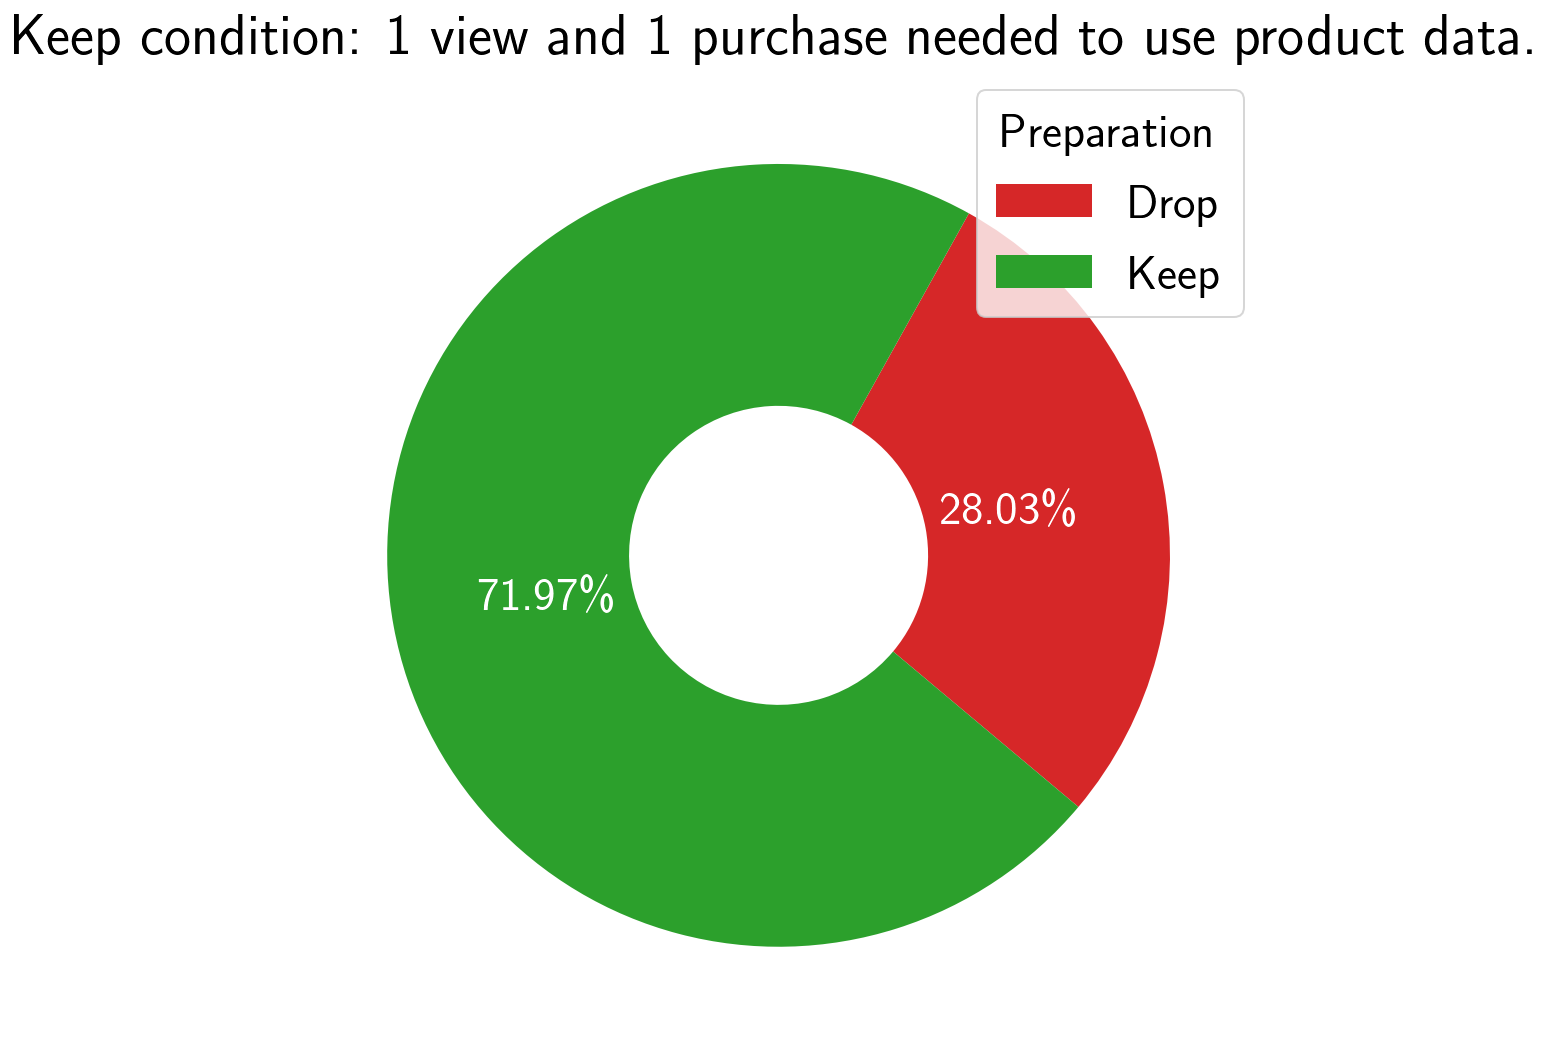

In [57]:
number_of_products_cluster(products_events_crosstab,1,1)

Keep condition: 5 views and no purchases needed to use product data.
Drop   6946 products (15.11%)
Keep  39014 products (84.89%)



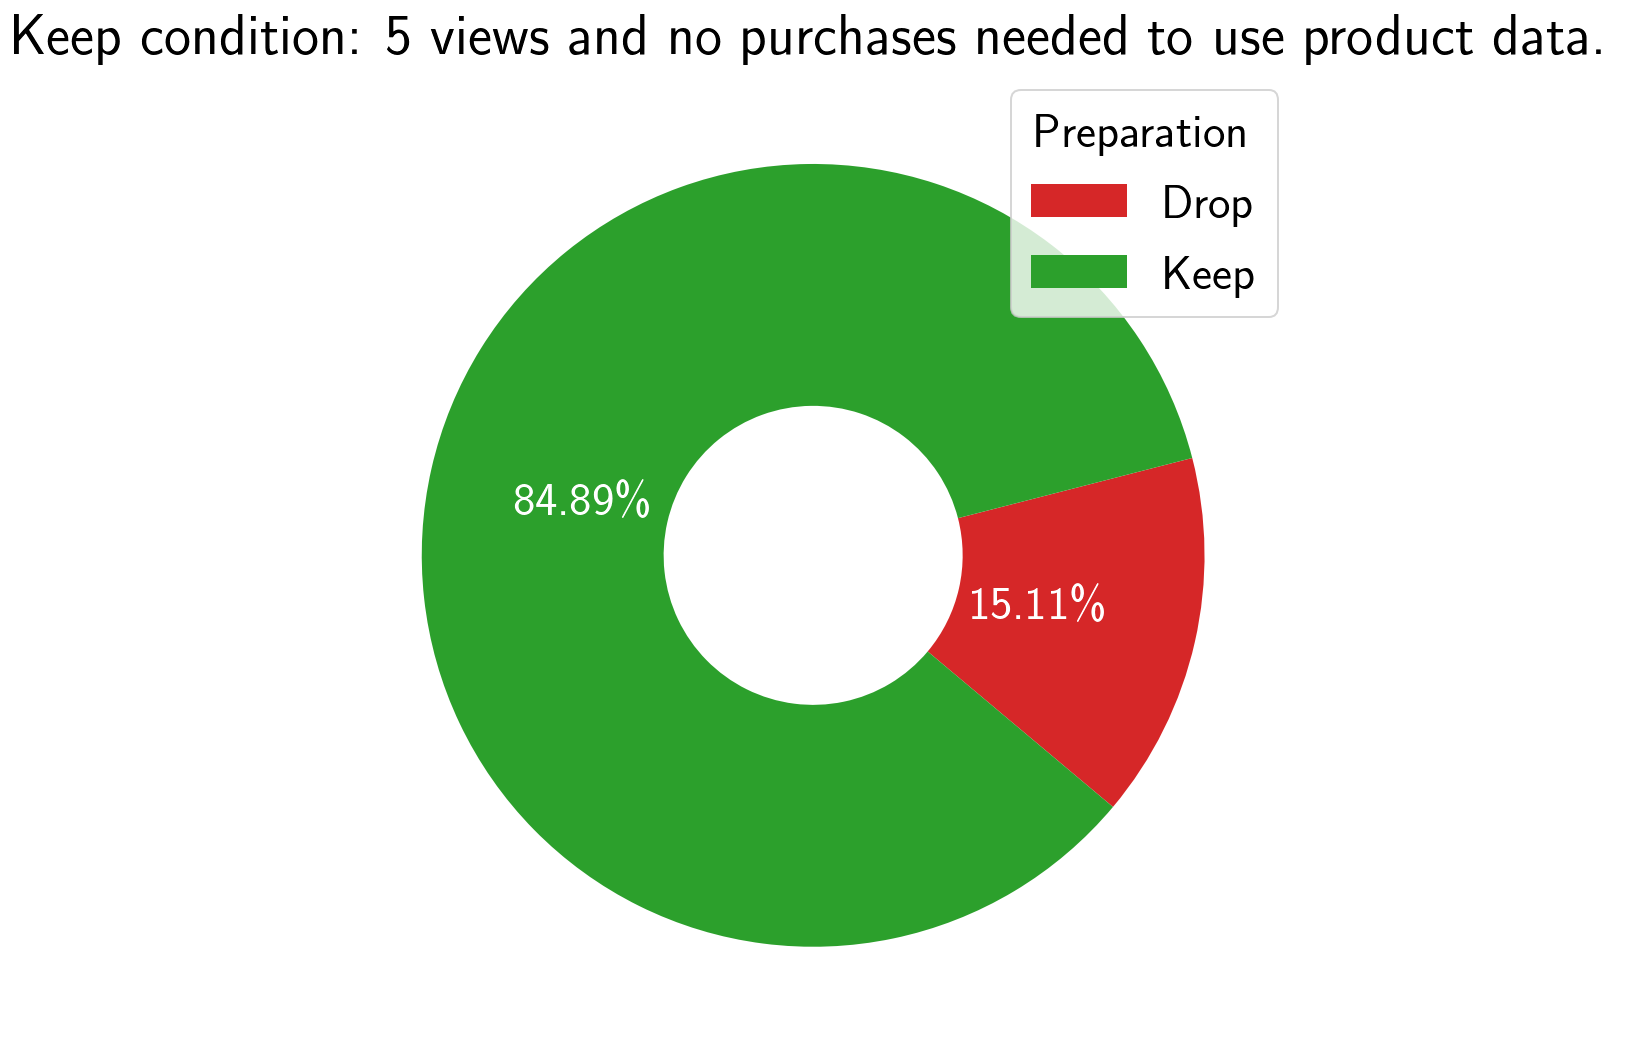

In [58]:
number_of_products_cluster(products_events_crosstab,5,0)

Keep condition: 5 views and 1 purchase needed to use product data.
Drop  13772 products (29.97%)
Keep  32188 products (70.03%)



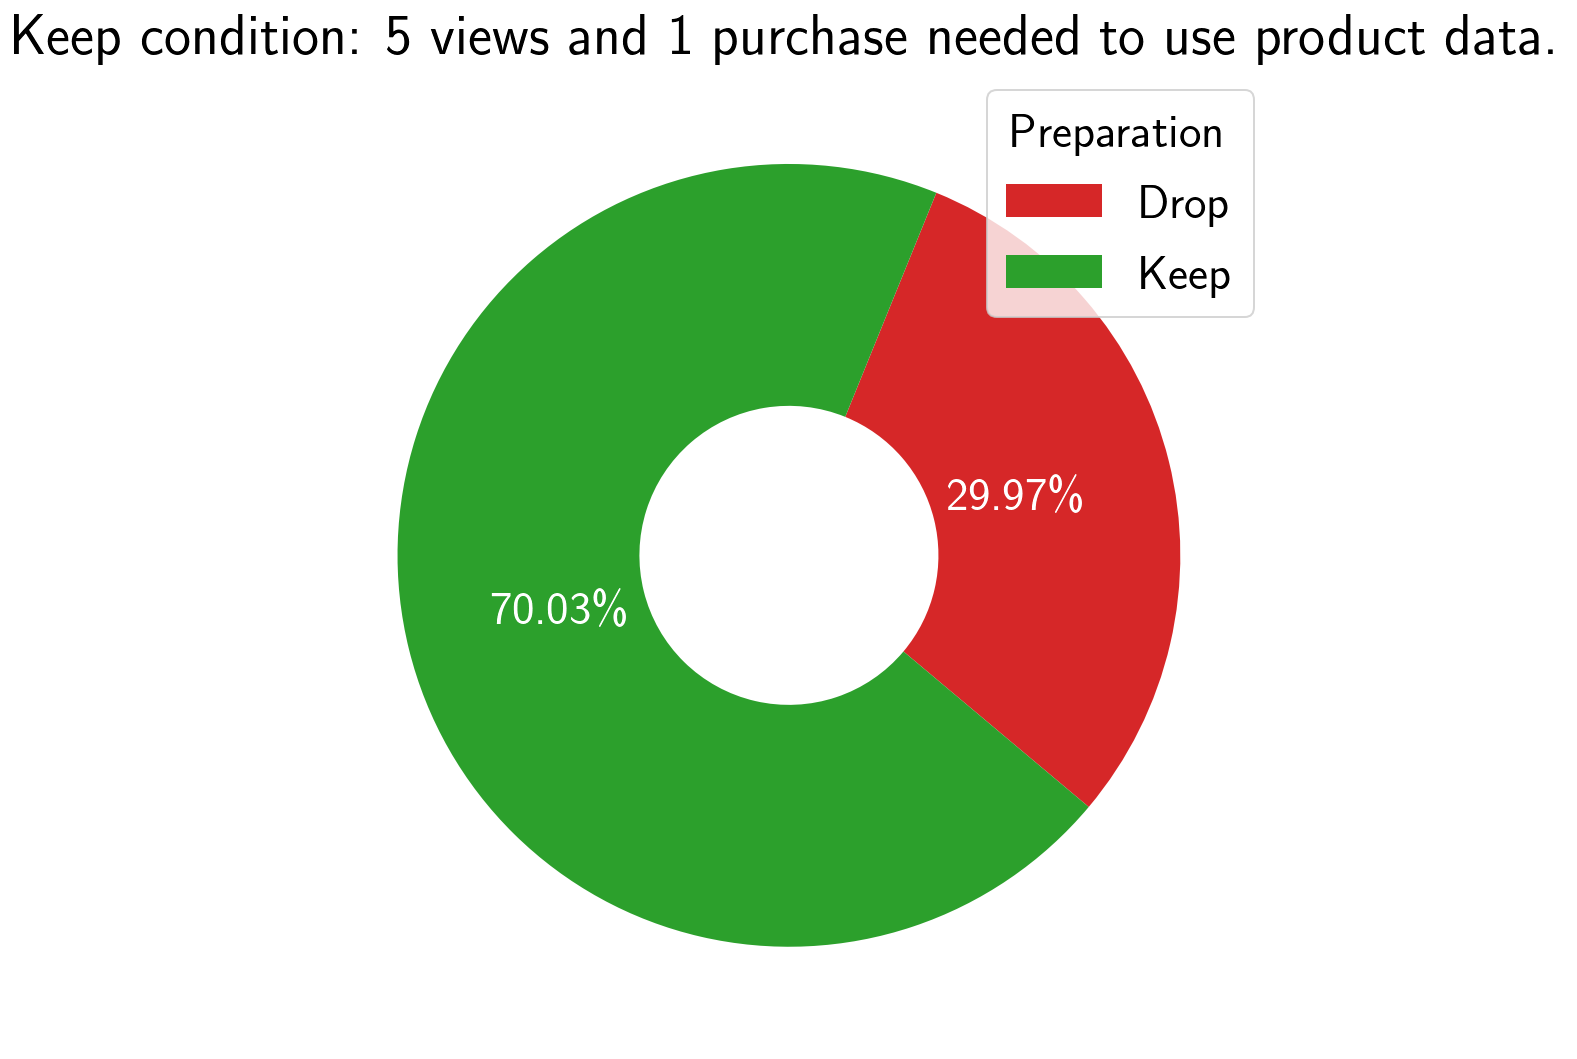

In [59]:
number_of_products_cluster(products_events_crosstab,5,1)

Keep condition: 10 views and no purchases needed to use product data.
Drop  11697 products (25.45%)
Keep  34263 products (74.55%)



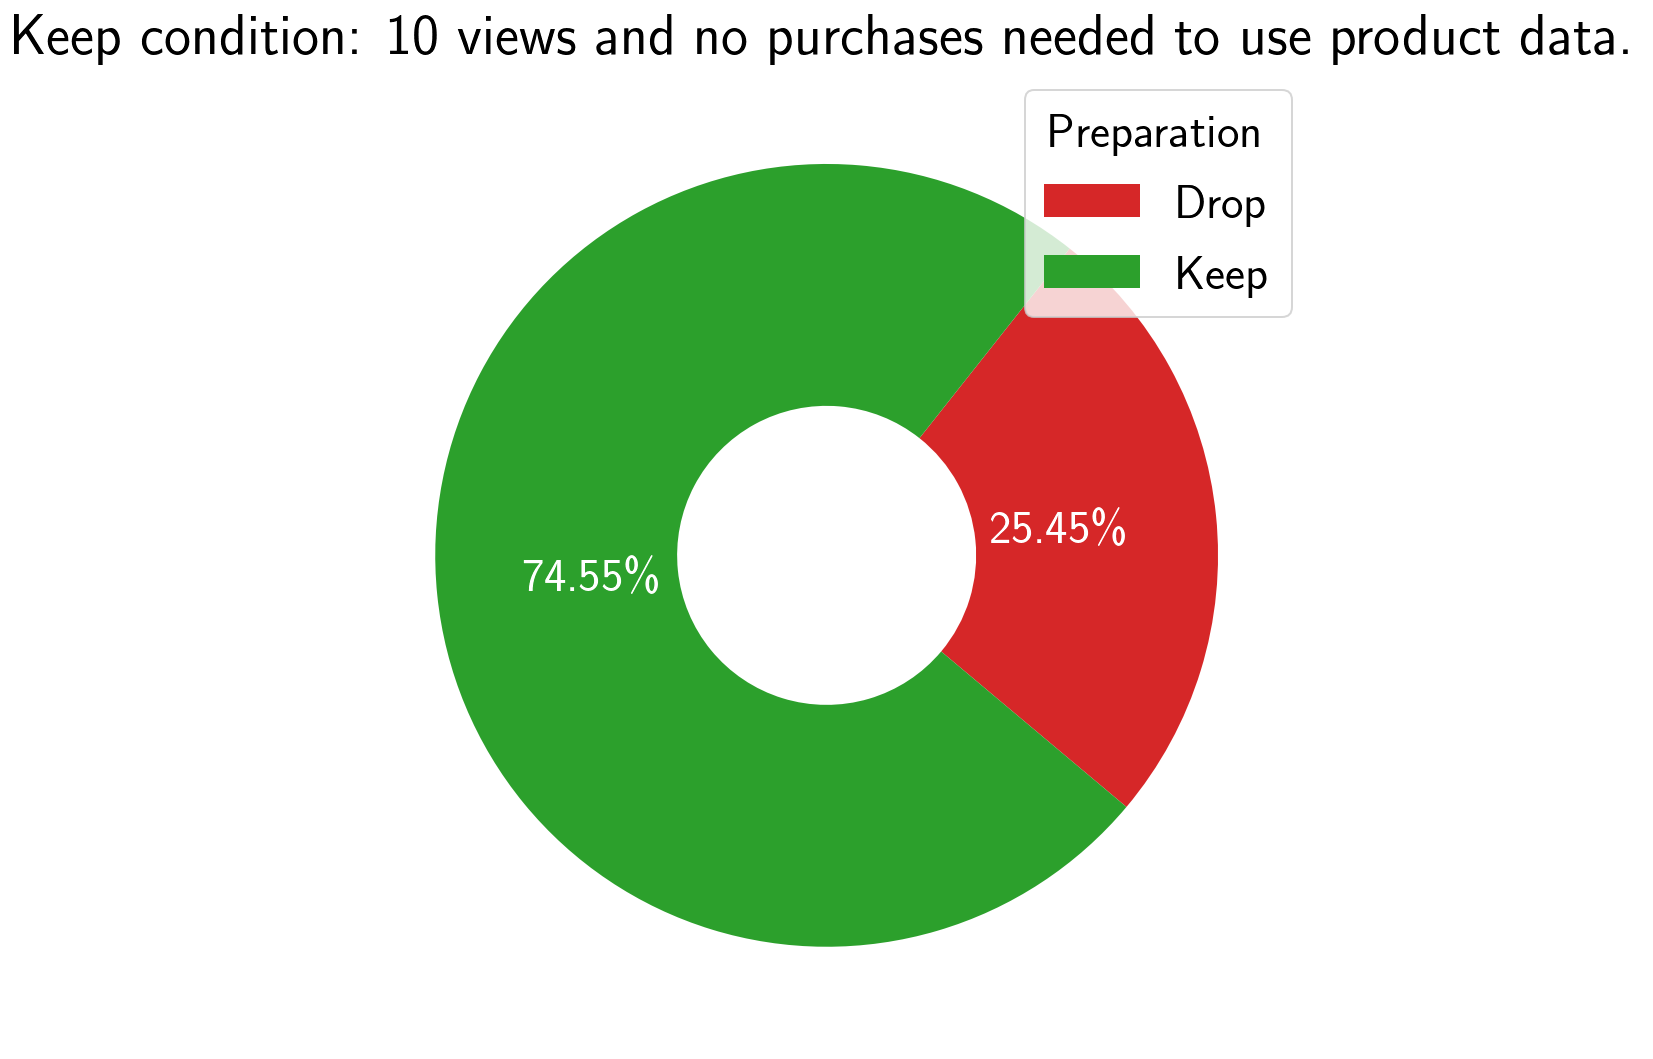

In [60]:
number_of_products_cluster(products_events_crosstab,10,0)

Keep condition: 10 views and 1 purchase needed to use product data.
Drop  15864 products (34.52%)
Keep  30096 products (65.48%)



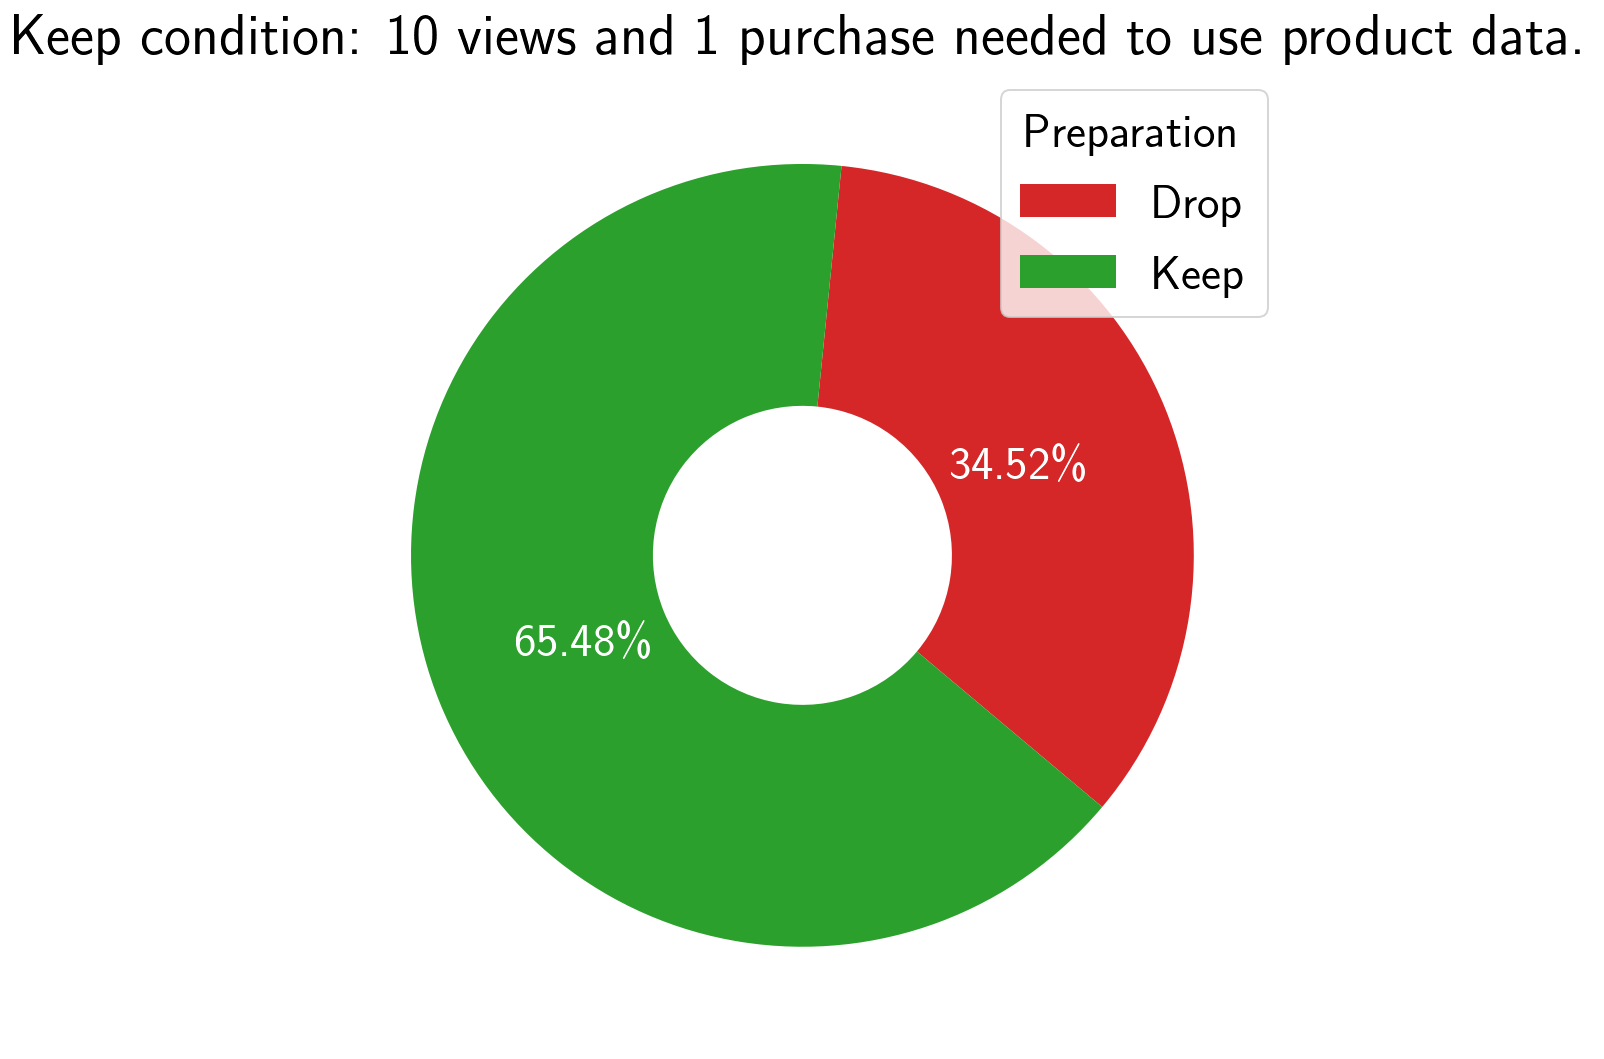

In [61]:
number_of_products_cluster(products_events_crosstab,10,1)

## Steps in the user journey

In [62]:
step = pd.Series(dtype='int64')

In [63]:
def pair_id_creator(df,event_type):
    pairs=df[df['event_type']==event_type][['user_id','product_id']].drop_duplicates().sort_values('user_id')
    pairs['pair_id'] = pairs['user_id'].astype(str)+'-'+pairs['product_id'].astype(str)
    return set(pairs['pair_id'])

In [64]:
view_pairs = pair_id_creator(df,'view')
cart_pairs = pair_id_creator(df,'cart')
remove_pairs = pair_id_creator(df,'remove_from_cart')
purchase_pairs = pair_id_creator(df,'purchase')

In [65]:
step['view_cart'] = len(view_pairs.intersection(cart_pairs))
step['cart_remove'] = len(cart_pairs.intersection(remove_pairs))
step['cart_purchase'] = len(cart_pairs.intersection(purchase_pairs))
step['view_purchase'] = len(view_pairs.intersection(purchase_pairs))
step['remove_purchase'] = len(remove_pairs.intersection(purchase_pairs))
step

view_cart          671398
cart_remove        864417
cart_purchase      497144
view_purchase      208828
remove_purchase     71193
dtype: int64

In [66]:
print(f"Chance for a viewed item to be added to cart: {step['view_cart']/event_counts['view']:.5f}")

Chance for a viewed item to be added to cart: 0.17048


In [67]:
print(f"Chance for an item in cart to be removed from it: {step['cart_remove']/event_counts['cart']:.5f}")

Chance for an item in cart to be removed from it: 0.33976


In [68]:
print(f"Chance for an item in cart to be purchased: {step['cart_purchase']/event_counts['cart']:.5f}")

Chance for an item in cart to be purchased: 0.19540


In [69]:
print(f"Chance for an item in cart be abandoned: {1-(step['cart_purchase']/event_counts['cart']+step['cart_remove']/event_counts['cart']):.5f}")

Chance for an item in cart be abandoned: 0.46484


In [70]:
print(f"Chance for a viewed item to be purchased: {step['view_purchase']/event_counts['view']:.5f}")

Chance for a viewed item to be purchased: 0.05302


In [71]:
print(f"Chance for an item removed from cart to be purchased: {step['remove_purchase']/event_counts['remove_from_cart']:.5f}")

Chance for an item removed from cart to be purchased: 0.04219


In [72]:
ux_constants = pd.Series(dtype='int64')

ux_constants['view_to_purchase'] = step['view_purchase']/event_counts['view']
ux_constants['cart_to_purchase'] = step['cart_purchase']/event_counts['cart']
ux_constants['remove_to_purchase'] = step['remove_purchase']/event_counts['remove_from_cart']
ux_constants['purchase_to_purchase'] = 1

## Events after purchase

In [73]:
dfs = df.copy()
dfs.drop(['category_id', 'category_code','brand','price','user_session'], axis=1, inplace=True)
dfs

,event_time,event_type,product_id,user_id
0,2019-10-01 00:00:00,cart,5773203,463240011
1,2019-10-01 00:00:03,cart,5773353,463240011
2,2019-10-01 00:00:07,cart,5881589,429681830
3,2019-10-01 00:00:07,cart,5723490,463240011
4,2019-10-01 00:00:15,cart,5881449,429681830
...,...,...,...,...
4635832,2019-11-30 23:59:46,view,5830317,457678989
4635833,2019-11-30 23:59:47,view,5733064,422196217
4635834,2019-11-30 23:59:47,view,5867785,572579084
4635835,2019-11-30 23:59:57,view,5779406,540006764


In [74]:
view_after_buy = Counter()
remo_after_buy = Counter()
cart_after_buy = Counter() 
purchase_events = Counter()
pre_purchase_sum = Counter()
purchase_sum = 0
post_purchase_sum = Counter() 
for row in dfs.itertuples():        
    if row.event_type != 'purchase' and purchase_events[(row.user_id,row.product_id)]>0:        
        if row.event_type == 'view':
            view_after_buy[(row.user_id,row.product_id)] += 1
        elif row.event_type == 'cart':
            cart_after_buy[(row.user_id,row.product_id)] += 1 
        else:
            remo_after_buy[(row.user_id,row.product_id)] += 1
        post_purchase_sum[row.event_type] += 1
    elif row.event_type == 'purchase':
        purchase_events[(row.user_id,row.product_id)] += 1
        purchase_sum += 1
    else:
        pre_purchase_sum[row.event_type] += 1

In [75]:
# Let's test the solution against a known value
assert purchase_sum == len(dfs[dfs.event_type=='purchase']), 'The number of purchases must match the known value.'
print(f"Number of purchases {purchase_sum}")

Number of purchases 568041


In [76]:
p1=pre_purchase_sum['view']*100/(pre_purchase_sum['view']+post_purchase_sum['view'])
p2=pre_purchase_sum['cart']*100/(pre_purchase_sum['cart']+post_purchase_sum['cart'])
p3=pre_purchase_sum['remove_from_cart']*100/(pre_purchase_sum['remove_from_cart']+post_purchase_sum['remove_from_cart'])
print("Events happening before  & after purchase")
print(f"view: {pre_purchase_sum['view']:7,} ({p1:.2f}%) & {post_purchase_sum['view']:6,} ({100-p1:.2f}%)")
print(f"cart: {pre_purchase_sum['cart']:7,} ({p2:.2f}%) & {post_purchase_sum['cart']:6,} ({100-p2:.2f}%)")
print(f"remo: {pre_purchase_sum['remove_from_cart']:7,} ({p3:.2f}%) & {post_purchase_sum['remove_from_cart']:6,} ({100-p3:.2f}%)")

Events happening before  & after purchase
view: 3,883,216 (98.60%) & 55,080 (1.40%)
cart: 2,509,881 (98.65%) & 34,311 (1.35%)
remo: 1,668,179 (98.85%) & 19,412 (1.15%)


In [77]:
def after_purchase_scenario(after_buy,purchase_sum):
    after_buy = np.pad(list(after_buy.values()), (0,purchase_sum-len(list(after_buy.values()))), 'constant')
    worst = after_buy.mean()+3*after_buy.std()
    print(f"Mean: {after_buy.mean()}")
    print(f"Standard deviation (STD): {after_buy.std()}")
    print(f"Worst rational case number of events: {int(worst)}")
    return int(worst)

In [78]:
print("view events after purchase")
worst_view_number = after_purchase_scenario(view_after_buy,purchase_sum)
print("\nremove from cart events after purchase")
worst_remove_number = after_purchase_scenario(remo_after_buy,purchase_sum)
print("\nadd to cart events after purchase")
worst_cart_number = after_purchase_scenario(cart_after_buy,purchase_sum)

view events after purchase
Mean: 0.09696483176390437
Standard deviation (STD): 0.5475150110268789
Worst rational case number of events: 1

remove from cart events after purchase
Mean: 0.03417358958244211
Standard deviation (STD): 0.3552707937839338
Worst rational case number of events: 1

add to cart events after purchase
Mean: 0.06040233011349533
Standard deviation (STD): 0.7254660441273392
Worst rational case number of events: 2


### UX event chain function (the results are not used in training)

In [79]:
V = ux_constants['view_to_purchase']
C = ux_constants['cart_to_purchase']
R = ux_constants['remove_to_purchase']
P = ux_constants['purchase_to_purchase']
def f(X=[0]):
    for i, x in enumerate(X):
        if i == 0:
            xi = np.tanh(X[i])
        else:
            xi = np.tanh(X[i]+X[i-1])
        X[i] = xi
    return X[-1]

In [80]:
worst_case = [P] + [C]*worst_cart_number + [V]*worst_view_number + [R]*worst_remove_number
ux_constants['positive_above'] = f(worst_case)
print(f"We should consider an event positive (likely purchase) above {ux_constants['positive_above']}.")

We should consider an event positive (likely purchase) above 0.6038386626777111.


*Note: The training alogrithm will not be exposed to this value, not even indirectly. The only use of this value is to test the data preparation.*

In [81]:
ux_constants

view_to_purchase        0.053025
cart_to_purchase        0.195403
remove_to_purchase      0.042186
purchase_to_purchase    1.000000
positive_above          0.603839
dtype: float64

In [82]:
ux_constants.to_csv(UX_CONSTANTS, index = True, header=False)